# Homework 2 - ​Predict Future Sales

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. Show runtime results for each cell. We also ask that code be commented to make it easier to follow.

## Colab Link

https://colab.research.google.com/drive/1z2e5nIzXLTPxfDTT01A1-Yd3CHn1lea5?usp=sharing 

Note: Can be viewed only from stonybrook.edu logins

## Environment Setup

### Mounting google drive with data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installation of libraries

In [ ]:
pip install seaborn==0.11.0

     |████████████████████████████████| 286kB 3.0MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [ ]:
pip install googletrans


     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 962kB 8.8MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=8376dc86b95f99003064c6b29af6f3f911ed96c857ed0de1a88871d7d1bdb791
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=f854172757a2ee9f6ffbd7fc9acefff82ae20f646786c26435452f531c220dcf
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


### Imports & Configurations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from googletrans import Translator

sns.set(rc={'figure.figsize':(10, 10)})
translator = Translator()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Part 1 - Data Cleaning and Merging

### Reading Data

and checking for null values


In [ ]:

# Edit the parent_dir with the path of the directory that contains your data files
parent_dir = 'drive/My Drive/CSE_519/HW1/'

sales_train_df = pd.read_csv(parent_dir + 'sales_train.csv')
items_df = pd.read_csv(parent_dir + 'items.csv')
shops_df = pd.read_csv(parent_dir + 'shops.csv')
item_categories_df = pd.read_csv(parent_dir + 'item_categories.csv')

In [ ]:
sales_train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000,1.000
1,03.01.2013,0,25,2552,899.000,1.000
2,05.01.2013,0,25,2552,899.000,-1.000
3,06.01.2013,0,25,2554,1709.050,1.000
4,15.01.2013,0,25,2555,1099.000,1.000
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.000,1.000
2935845,09.10.2015,33,25,7460,299.000,1.000
2935846,14.10.2015,33,25,7459,349.000,1.000
2935847,22.10.2015,33,25,7440,299.000,1.000


In [ ]:
items_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
shops_df

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
item_categories_df

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


Checking if there are null values in any cells

In [ ]:
sales_train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
items_df.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [ ]:
shops_df.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [ ]:
item_categories_df.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [ ]:
len(sales_train_df)

2935849

In [ ]:
len(items_df)

22170

### Translate to English

Translating item category names to English

In [ ]:
item_categories_df['item_category_name'] = item_categories_df['item_category_name'].apply(translator.translate, dest='en').apply(getattr, args=('text',))

In [ ]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


Translating shop names to English

In [ ]:
shops_df['shop_name'] = shops_df['shop_name'].apply(translator.translate, dest='en').apply(getattr, args=('text',))

In [ ]:
shops_df.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea shopping center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


### Merging Data:

Merging the data to get 1 train dataframe

In [ ]:
train_df = sales_train_df.merge(items_df, how='left', on='item_id')
train_df = train_df.merge(item_categories_df, how='left', on='item_category_id')
train_df = train_df.merge(shops_df, how='left', on='shop_id')
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.000,1.000,ЯВЛЕНИЕ 2012 (BD),37,Movie - Blu-Ray,"Yaroslavl TC ""Altair"""
1,03.01.2013,0,25,2552,899.000,1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
2,05.01.2013,0,25,2552,899.000,-1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
3,06.01.2013,0,25,2554,1709.050,1.000,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
4,15.01.2013,0,25,2555,1099.000,1.000,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - branded CD,"Moscow TRK ""Atrium"""
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.000,1.000,V/A Nu Jazz Selection (digipack),55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935845,09.10.2015,33,25,7460,299.000,1.000,V/A The Golden Jazz Collection 1 2CD,55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935846,14.10.2015,33,25,7459,349.000,1.000,V/A The Best Of The 3 Tenors,55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935847,22.10.2015,33,25,7440,299.000,1.000,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Music - MP3,"Moscow TRK ""Atrium"""


In [ ]:
train_df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'], dayfirst=True)
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.000,1.000,ЯВЛЕНИЕ 2012 (BD),37,Movie - Blu-Ray,"Yaroslavl TC ""Altair"""
1,2013-01-03,0,25,2552,899.000,1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
2,2013-01-05,0,25,2552,899.000,-1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
3,2013-01-06,0,25,2554,1709.050,1.000,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
4,2013-01-15,0,25,2555,1099.000,1.000,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - branded CD,"Moscow TRK ""Atrium"""
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.000,1.000,V/A Nu Jazz Selection (digipack),55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935845,2015-10-09,33,25,7460,299.000,1.000,V/A The Golden Jazz Collection 1 2CD,55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935846,2015-10-14,33,25,7459,349.000,1.000,V/A The Best Of The 3 Tenors,55,Music - locally produced CD,"Moscow TRK ""Atrium"""
2935847,2015-10-22,33,25,7440,299.000,1.000,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Music - MP3,"Moscow TRK ""Atrium"""


### Removing Anomalies:



item_cnt_day is the number of products sold, so it's value cannot be less than 0. Checking and removing if any such anomalies exist.

Although, returns can be represented in negatives, but I'll choose to eliminate those values

In [ ]:
len(train_df)

2935849

In [ ]:
train_df[train_df['item_cnt_day'] < 0].count()

date                  7356
date_block_num        7356
shop_id               7356
item_id               7356
item_price            7356
item_cnt_day          7356
item_name             7356
item_category_id      7356
item_category_name    7356
shop_name             7356
dtype: int64

In [ ]:
train_df = train_df[train_df['item_cnt_day'] > 0]
assert(len(train_df) == (2935849 - 7356)) #7356 rows should be removed from train dataframe

In [ ]:
len(train_df)

2928493

item_price is the price of an item, so it's value cannot be less than 0. Checking and removing if any such anomalies exist.

In [ ]:
train_df[train_df['item_price'] < 0].count()

date                  1
date_block_num        1
shop_id               1
item_id               1
item_price            1
item_cnt_day          1
item_name             1
item_category_id      1
item_category_name    1
shop_name             1
dtype: int64

In [ ]:
train_df = train_df[train_df['item_price'] > 0]
assert(len(train_df) == (2928493 - 1)) #1 row should be removed from train dataframe

date_block_num is a consecutive month number, so it's value cannot be less than 0. Checking and removing if any such anomalies exist.

In [ ]:
train_df[train_df['date_block_num'] < 0].count()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [ ]:
train_df['date'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
train_df['date'].max()

Timestamp('2015-10-31 00:00:00')

Plotting Item sale v/s item price

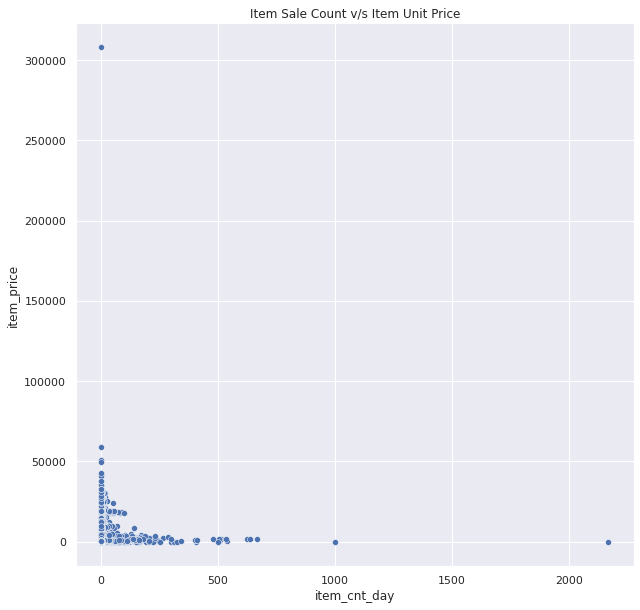

In [ ]:
ax = sns.scatterplot(x='item_cnt_day', y='item_price', data=train_df)
ax.set_title('Item Sale Count v/s Item Unit Price')
plt.show()

plotting log of item sale v/s log of item price

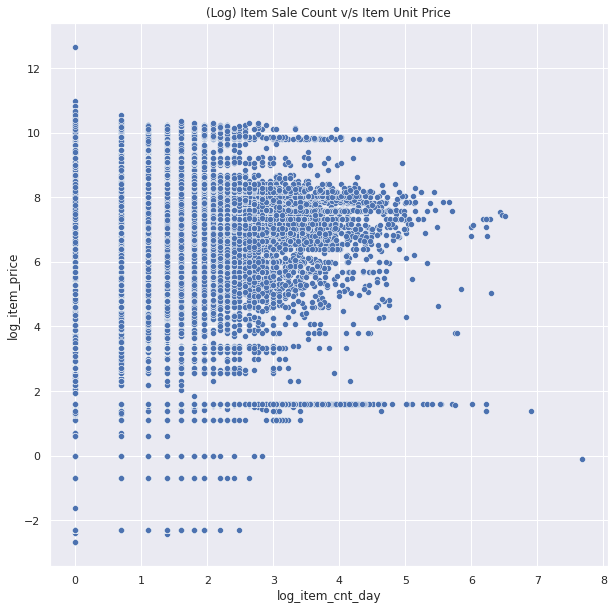

In [ ]:
log_data = train_df.copy()
log_data['log_item_cnt_day'] = np.log(train_df['item_cnt_day'])
log_data['log_item_price'] = np.log(train_df['item_price'])
ax = sns.scatterplot(x='log_item_cnt_day', y='log_item_price', data=log_data)
ax.set_title('(Log) Item Sale Count v/s Item Unit Price')
plt.show()

From the above plots, we can see certain outliers -- I would want to clean the data off these outliers, but I will hold on to them till I have done at least one round of fitting my model along with the outliers to understand how they would affect my predictions. Later, I will also check the model by cleaning the data off the outliers and evaluate my model on the validation/dev set that I will hold out from the complete train set.

### Visualizing the data to gain insights

Plotting shop-wise sale

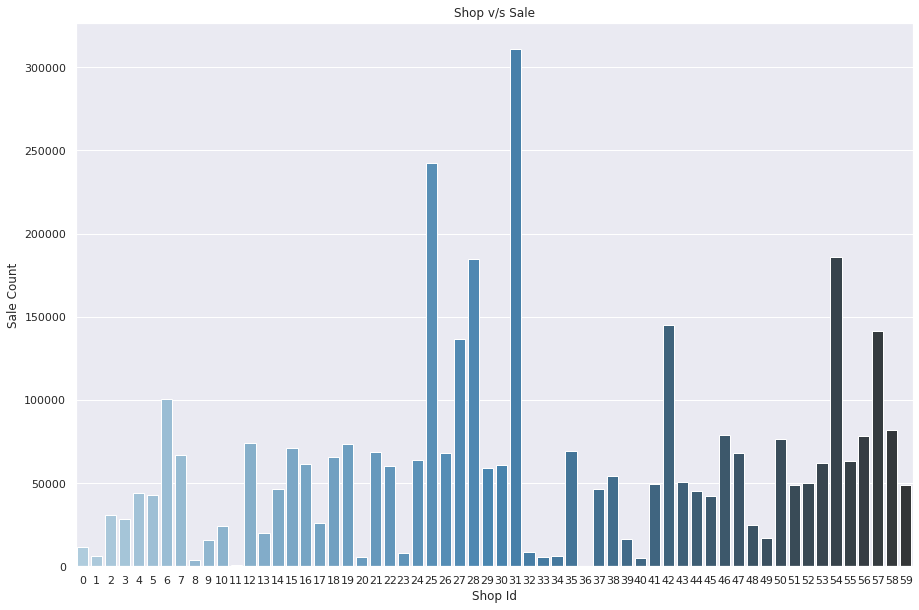

In [ ]:
shop_groupby = train_df.groupby('shop_id', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
shop_sale_plot = sns.barplot(x='shop_id', y='item_cnt_day', data=shop_groupby, palette='Blues_d')
shop_sale_plot.set_title('Shop v/s Sale');
shop_sale_plot.set(xlabel='Shop Id', ylabel='Sale Count')
plt.show()

The above graph shows that there are certain shops which have high sale count recorded with shop#31 leading the board. And there are also certain shops with very little or no sale recorded. Rest being on an average in a similar range of sale records.

Plotting item-category-wise sale

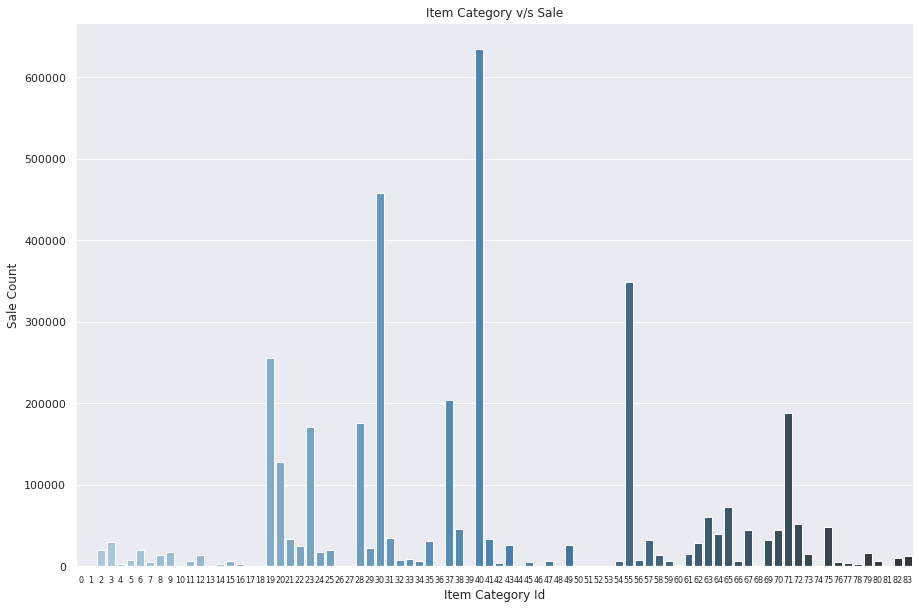

In [ ]:
item_category_groupby = train_df.groupby('item_category_id', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
item_categ_sale_plot = sns.barplot(x='item_category_id', y='item_cnt_day', data=item_category_groupby, palette='Blues_d')
item_categ_sale_plot.set_title('Item Category v/s Sale');
item_categ_sale_plot.set(xlabel='Item Category Id', ylabel='Sale Count')
item_categ_sale_plot.set_xticklabels(item_categ_sale_plot.get_xticklabels(), fontsize=8)
plt.show()

The above graph shows that there are certain item-categories which have high sale count recorded with item-category#40 recording the highest dale. And there are many categories with very little or no sale recorded. A few have sale records that are not too high nor too low. There seems to be a skewed distribution of item-categories and sale records.

Plotting consecutive month wise sale 

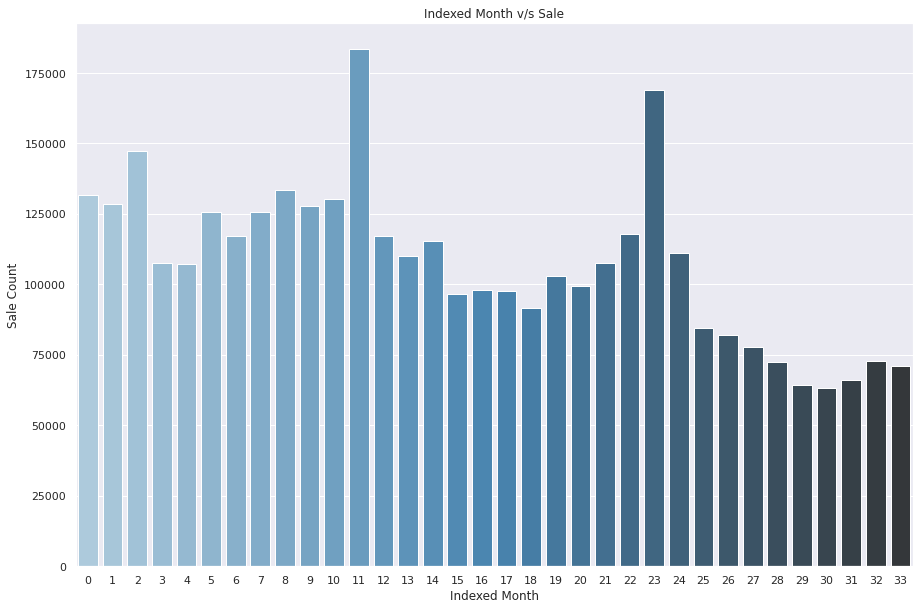

In [ ]:
date_block_num_groupby = train_df.groupby('date_block_num', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
date_block_num_sale_plot = sns.barplot(x='date_block_num', y='item_cnt_day', data=date_block_num_groupby, palette='Blues_d')
date_block_num_sale_plot.set_title('Indexed Month v/s Sale');
date_block_num_sale_plot.set(xlabel='Indexed Month', ylabel='Sale Count')
plt.show()

More or less, the sales don't seem to be very skewed across all months of the recorded duration, with very few exceptions like month#11 and #23.

### Data Statistics:

Getting an idea of Statistics of data:

- Number of unique shops, items, item_categories. 


- Number of days, and the number of months the data spans over.

In [ ]:
train_df['shop_id'].nunique()

60

In [ ]:
train_df['item_id'].nunique()

21804

In [ ]:
train_df['item_category_id'].nunique()

84

In [ ]:
train_df['date'].nunique()

1034

In [ ]:
train_df['date_block_num'].nunique()

34

In [ ]:
# The dataset does seem to have data from each day of the 189 months approximately

34*30 + 17 #no. of months*30 + no. of months/2  (to get the approx number of days)

1037

## Part 2 - Time Series Analysis

### Adding required columns

In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.000,1.000,ЯВЛЕНИЕ 2012 (BD),37,Movie - Blu-Ray,"Yaroslavl TC ""Altair"""
1,2013-01-03,0,25,2552,899.000,1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
3,2013-01-06,0,25,2554,1709.050,1.000,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRK ""Atrium"""
4,2013-01-15,0,25,2555,1099.000,1.000,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - branded CD,"Moscow TRK ""Atrium"""
5,2013-01-10,0,25,2564,349.000,1.000,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Music - Music video,"Moscow TRK ""Atrium"""


In [ ]:
train_df['total_revenue'] = train_df['item_cnt_day'] * train_df['item_price']

In [ ]:
train_df = train_df.set_index('date')

In [ ]:
train_df['day_of_week'] = train_df.index.dayofweek

In [ ]:
train_df['day_of_month'] = train_df.index.day

In [ ]:
train_df['month'] = train_df.index.month

In [ ]:
train_df['year'] = train_df.index.year

In [ ]:
train_df.head(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total_revenue,day_of_week,day_of_month,month,year
date,,,,,,,,,,,,,,
2013-01-02,0,59,22154,999.000,1.000,ЯВЛЕНИЕ 2012 (BD),37,Movie - Blu-Ray,"Yaroslavl TC ""Altair""",999.000,2,2,1,2013
2013-01-03,0,25,2552,899.000,1.000,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRK ""Atrium""",899.000,3,3,1,2013
2013-01-06,0,25,2554,1709.050,1.000,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRK ""Atrium""",1709.050,6,6,1,2013
2013-01-15,0,25,2555,1099.000,1.000,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - branded CD,"Moscow TRK ""Atrium""",1099.000,1,15,1,2013
2013-01-10,0,25,2564,349.000,1.000,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Music - Music video,"Moscow TRK ""Atrium""",349.000,3,10,1,2013
2013-01-02,0,25,2565,549.000,1.000,DEEP PURPLE Stormbringer (фирм.),56,Music - branded CD,"Moscow TRK ""Atrium""",549.000,2,2,1,2013
2013-01-04,0,25,2572,239.000,1.000,DEFTONES Koi No Yokan,55,Music - locally produced CD,"Moscow TRK ""Atrium""",239.000,4,4,1,2013
2013-01-11,0,25,2572,299.000,1.000,DEFTONES Koi No Yokan,55,Music - locally produced CD,"Moscow TRK ""Atrium""",299.000,4,11,1,2013
2013-01-03,0,25,2573,299.000,3.000,DEL REY LANA Born To Die,55,Music - locally produced CD,"Moscow TRK ""Atrium""",897.000,3,3,1,2013


### Visualizing time series data

#### Monthly

Plotting total sale count by month of year

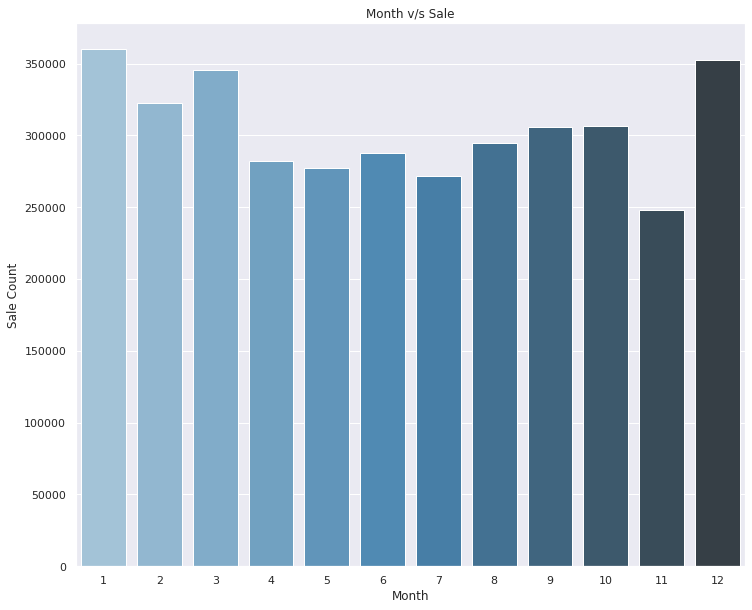

In [ ]:
monthly_groupby = train_df.groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,10])
shop_sale_plot = sns.barplot(x='month', y='item_cnt_day', data=monthly_groupby, palette='Blues_d')
shop_sale_plot.set_title('Month v/s Sale');
shop_sale_plot.set(xlabel='Month', ylabel='Sale Count')
plt.show()

December (12) and January (1) seem to record higher number of sales, and understandably so since December and January are usually universal holiday seasons and more sales tend to take place during that time.

Also, we should note here that November and December sales here do not include records from 2015 where as the other months do. November's dip might be explained by that. And december might have a higher peak if 2015's data was available.

Plotting total sale count by specific months 
(same plot as before in Removing Anomalies section)

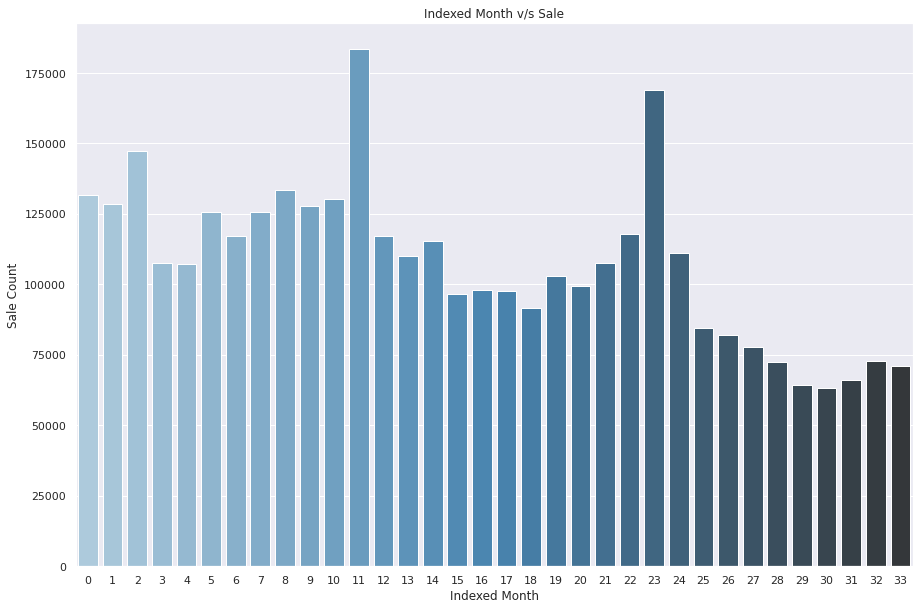

In [ ]:
date_block_num_groupby = train_df.groupby('date_block_num', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
date_block_num_sale_plot = sns.barplot(x='date_block_num', y='item_cnt_day', data=date_block_num_groupby, palette='Blues_d')
date_block_num_sale_plot.set_title('Indexed Month v/s Sale');
date_block_num_sale_plot.set(xlabel='Indexed Month', ylabel='Sale Count')
plt.show()

Here, again we can see #11 and #23 seem to have sale records outstanding from other months, and both correspond to the month of November in 2013 and 2014 respectively.

#### Weekly

Plot total sale count by day of week

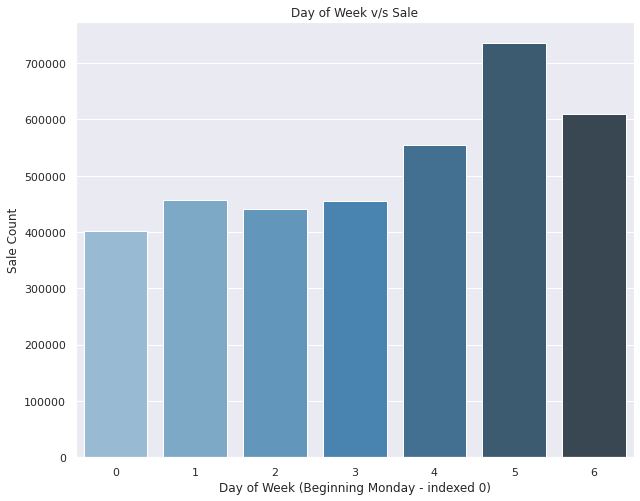

In [ ]:
weekly_groupby = train_df.groupby('day_of_week', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[10,8])
shop_sale_plot = sns.barplot(x='day_of_week', y='item_cnt_day', data=weekly_groupby, palette='Blues_d')
shop_sale_plot.set_title('Day of Week v/s Sale');
shop_sale_plot.set(xlabel='Day of Week (Beginning Monday - indexed 0)', ylabel='Sale Count')
plt.show()

We can see weekend (Friday-Sunday) marks a higher sale record which is not surprising since usually weekends are the time people are off-work and tend to shop more.

#### Yearly

Plot total sale count by year

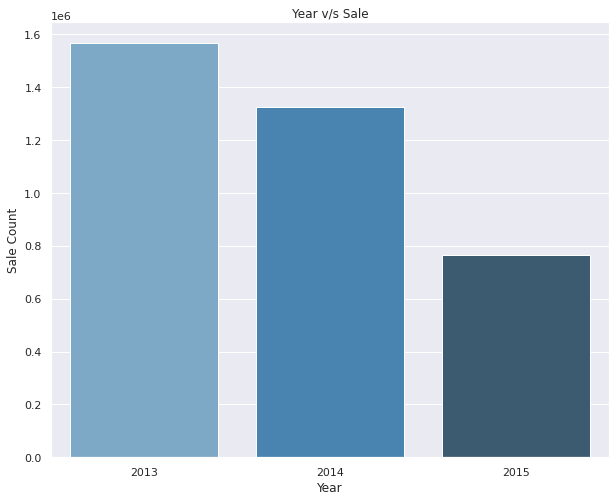

In [ ]:
yearly_groupby = train_df.groupby('year', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[10,8])
shop_sale_plot = sns.barplot(x='year', y='item_cnt_day', data=yearly_groupby, palette='Blues_d')
shop_sale_plot.set_title('Year v/s Sale');
shop_sale_plot.set(xlabel='Year', ylabel='Sale Count')
plt.show()

2013 marked the year of higher sale among the reported duration. We must also note that 2015's November and December records were not in the data so the dip can be explained by that, specially when we saw that the trend was to have higher sales in Nov and Dec relatively. 

## Part 3 - More Time Series Analysis

Translation to English done in Part 1

### General trend of sale records for item-categories and shops

Plotting the same graph from 'Removing Anomalies' section to view the sales trend for item categories and shops.

Item-Categories Sale:

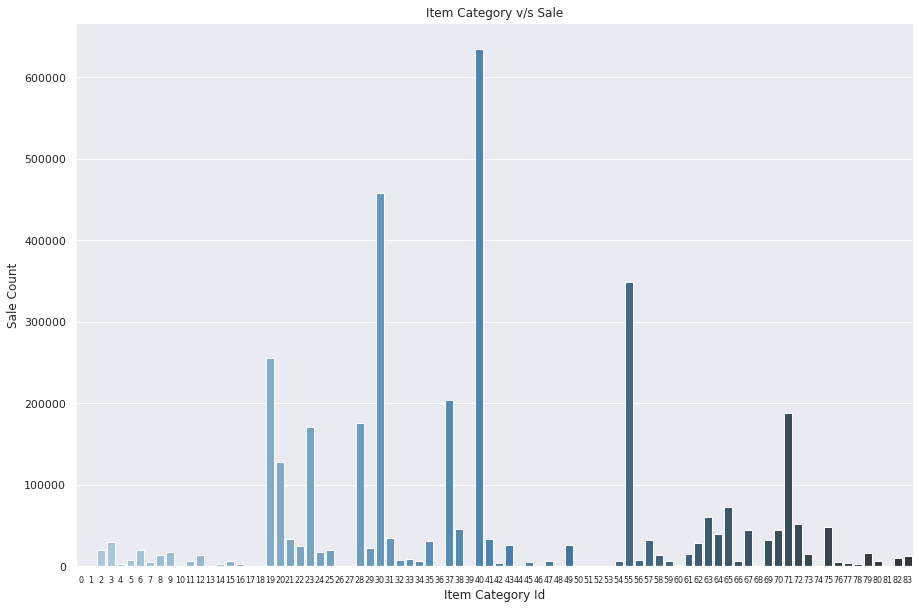

In [ ]:
item_category_groupby = train_df.groupby('item_category_id', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
item_categ_sale_plot = sns.barplot(x='item_category_id', y='item_cnt_day', data=item_category_groupby, palette='Blues_d')
item_categ_sale_plot.set_title('Item Category v/s Sale');
item_categ_sale_plot.set(xlabel='Item Category Id', ylabel='Sale Count')
item_categ_sale_plot.set_xticklabels(item_categ_sale_plot.get_xticklabels(), fontsize=8)
plt.show()

The above graph shows that there are certain item-categories which have high sale count recorded with item-category#40 recording the highest dale. And there are many categories with very little or no sale recorded. A few have sale records that are not too high nor too low. There seems to be a skewed distribution of item-categories and sale records.

Shop-wise Sale:

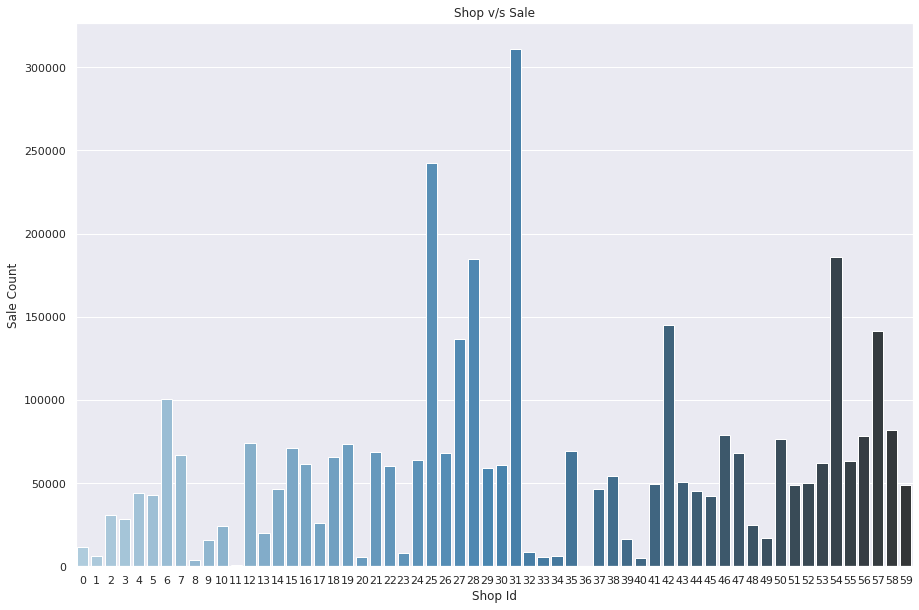

In [ ]:
shop_groupby = train_df.groupby('shop_id', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[15,10])
shop_sale_plot = sns.barplot(x='shop_id', y='item_cnt_day', data=shop_groupby, palette='Blues_d')
shop_sale_plot.set_title('Shop v/s Sale');
shop_sale_plot.set(xlabel='Shop Id', ylabel='Sale Count')
plt.show()

The above graph shows that there are certain shops which have high sale count recorded with shop#31 leading the board. And there are also certain shops with very little or no sale recorded. Rest being on an average in a similar range of sale records.

### Finding the item category and Shop name with most sales and highest revenue respectively

In [ ]:
train_df.groupby('item_category_id', as_index=False).agg({'item_cnt_day': 'sum', 'item_category_name':'last'}).sort_values(by='item_cnt_day', ascending=False).reset_index(drop=True).head()

,item_category_id,item_cnt_day,item_category_name
0,40,634885.000,Movie - DVD
1,30,457359.000,PC Games - Standard Editions
2,55,349050.000,Music - locally produced CD
3,19,255756.000,Games - PS3
4,37,204031.000,Movie - Blu-Ray


In [ ]:
train_df.groupby('item_category_id', as_index=False).agg({'total_revenue': 'sum', 'item_category_name':'last'}).sort_values(by='total_revenue', ascending=False).reset_index(drop=True).head()

,item_category_id,total_revenue,item_category_name
0,19,413504934.810,Games - PS3
1,20,374300222.340,Games - PS4
2,12,293091709.480,Game consoles - PS4
3,23,260649973.010,Games - XBOX 360
4,30,257959274.720,PC Games - Standard Editions


Item categories with most sales turned out to be different from those with the highest revenue, but we are interested in most sales so we will use the first set of results.

In [ ]:
train_df.groupby('shop_id', as_index=False).agg({'total_revenue': 'sum', 'shop_name':'last'}).sort_values(by='total_revenue', ascending=False).reset_index(drop=True).head()

,shop_id,total_revenue,shop_name
0,31,235661082.870,"Moscow TC ""Semenovsky"""
1,25,216967635.600,"Moscow TRK ""Atrium"""
2,28,160129605.680,"Moscow TC ""MEGA Teply Stan"" II"
3,42,152279147.890,"SPb TC ""Nevsky Center"""
4,54,142421820.280,"Khimki TC ""Mega"""


In [ ]:
train_df.groupby('shop_id', as_index=False).agg({'item_cnt_day': 'sum', 'shop_name':'last'}).sort_values(by='item_cnt_day', ascending=False).reset_index(drop=True).head()

,shop_id,item_cnt_day,shop_name
0,31,311230.000,"Moscow TC ""Semenovsky"""
1,25,242237.000,"Moscow TRK ""Atrium"""
2,54,186149.000,"Khimki TC ""Mega"""
3,28,184777.000,"Moscow TC ""MEGA Teply Stan"" II"
4,42,145195.000,"SPb TC ""Nevsky Center"""


Shops with most sales and highest revenue turned out to be more or less the same with the ranking of the last 3 among the top 5 being displaced. Since we are interested in highest revenue shops, we will go with the first set of results.

### Plotting

#### Item Categories

##### Item category "Movies-DVD" with top most sales

Plotting amount of sales by month for item category 'Movie - DVD' with item category id 40 as that is the category with the most sales.

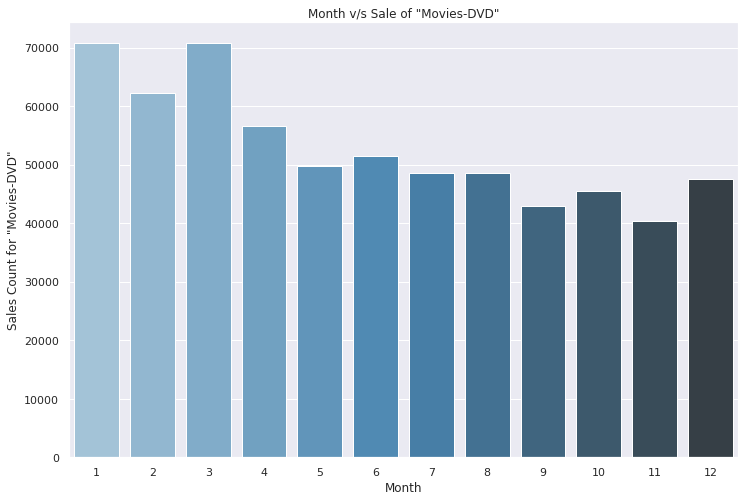

In [ ]:
ic_monthly_groupby = train_df[train_df.item_category_id == 40].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "Movies-DVD"');
plot.set(xlabel='Month', ylabel='Sales Count for "Movies-DVD"')
plt.show()

Line plot for the same:

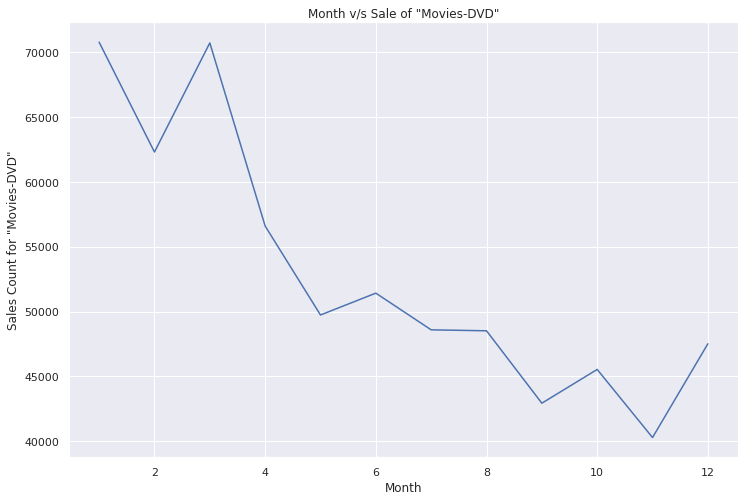

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "Movies-DVD"');
plot.set(xlabel='Month', ylabel='Sales Count for "Movies-DVD"')
plt.show()

We can see from the bar plot and the line plot above that tere were 2 spikes in Jan and March for the sale of Movies-DVD, also, we see that there is a trend of declining sales through the year until it looks like it starts picking up again in December. One hypothesis could be that the release of the DVDs are focussed in the months of higher sale.

##### Item category "PC Games - Standard Editions" with second most sales

Plotting amount of sales by month for item category 'PC Games - Standard Editions' with item category id 30 as that is the category with the second most sales.

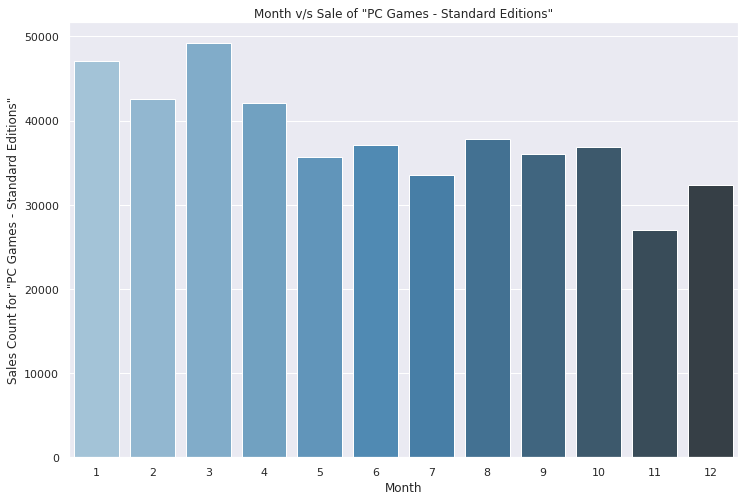

In [ ]:
ic_monthly_groupby = train_df[train_df.item_category_id == 30].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "PC Games - Standard Editions"');
plot.set(xlabel='Month', ylabel='Sales Count for "PC Games - Standard Editions"')
plt.show()

Line plot for the same:

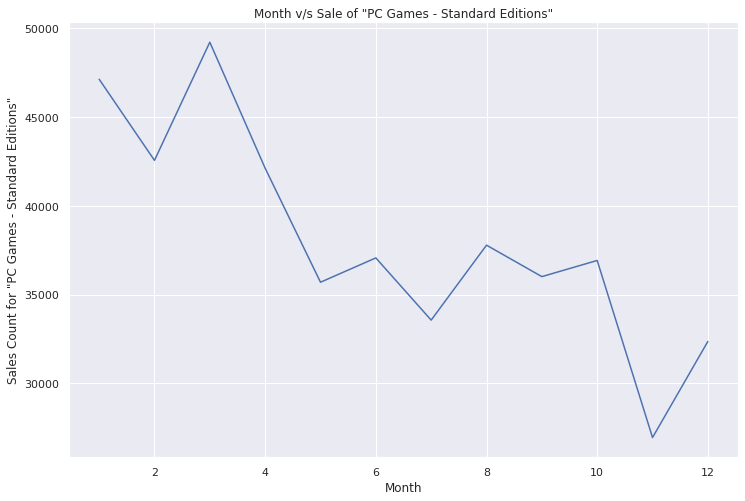

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "PC Games - Standard Editions"');
plot.set(xlabel='Month', ylabel='Sales Count for "PC Games - Standard Editions"')
plt.show()

PC games - standard editions seem to have a more or less consistent sale record through the year except for a few low sale months with 2 dips seen after the month of March (3) and a stronger one in October (10); and 2 peaks in the month of Jan (1) and March (3). Peaks have a similar pattern as for Movies-DVD.

##### Item category "Music - locally produced CD" with third most sales

Plotting amount of sales by month for item category 'Music - locally produced CD' with item category id 55 as that is the category with the third most sales.

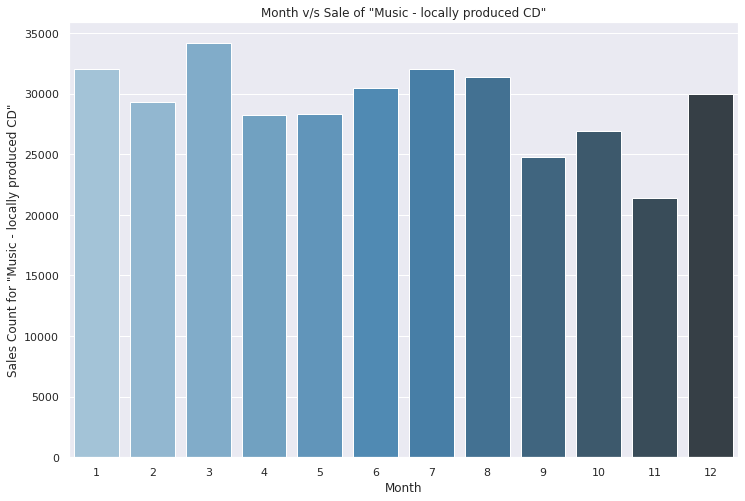

In [ ]:
ic_monthly_groupby = train_df[train_df.item_category_id == 55].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "Music - locally produced CD"');
plot.set(xlabel='Month', ylabel='Sales Count for "Music - locally produced CD"')
plt.show()

Line plot for the same:

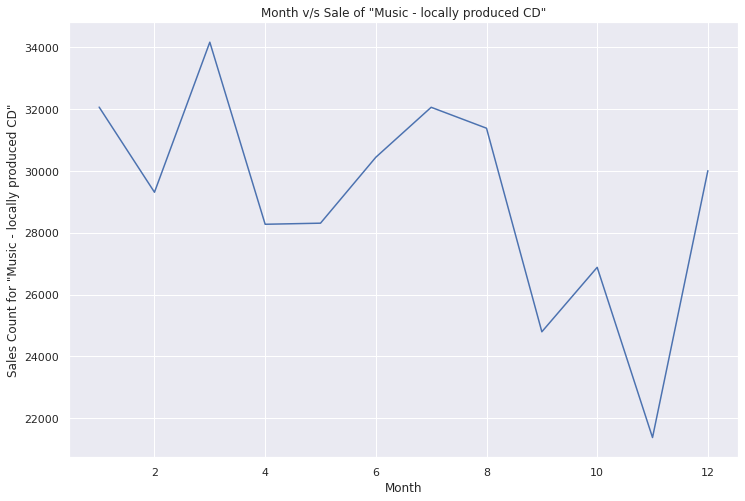

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=ic_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale of "Music - locally produced CD"');
plot.set(xlabel='Month', ylabel='Sales Count for "Music - locally produced CD"')
plt.show()

We similar trend for this category as well with the peaks being in Jan and March, and a strong dip after October. 
The trend seems to be consistent with considerable fluctuations apart from that, with an increasing sale trend seen being picked up in Dec.

#### Shops

##### Shop with Id 31 with highest revenue

Plotting amount of sales by month for shop with shop id 31 as that is the shop with the highest revenue.

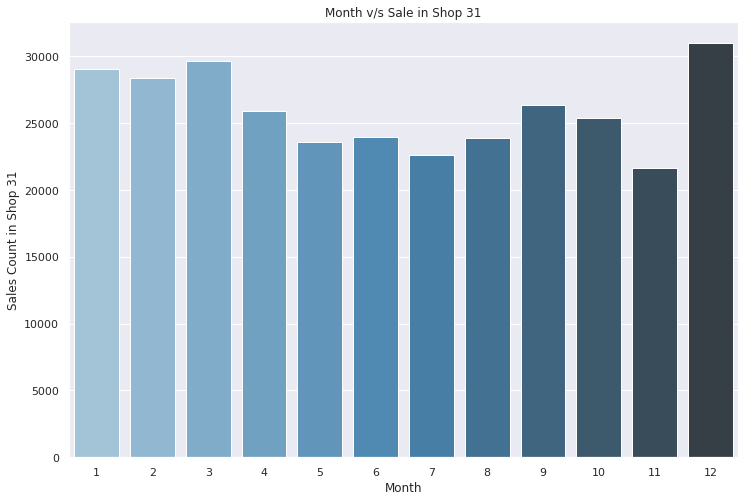

In [ ]:
shop_monthly_groupby = train_df[train_df.shop_id == 31].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 31');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 31')
plt.show()

Line plot for the same:

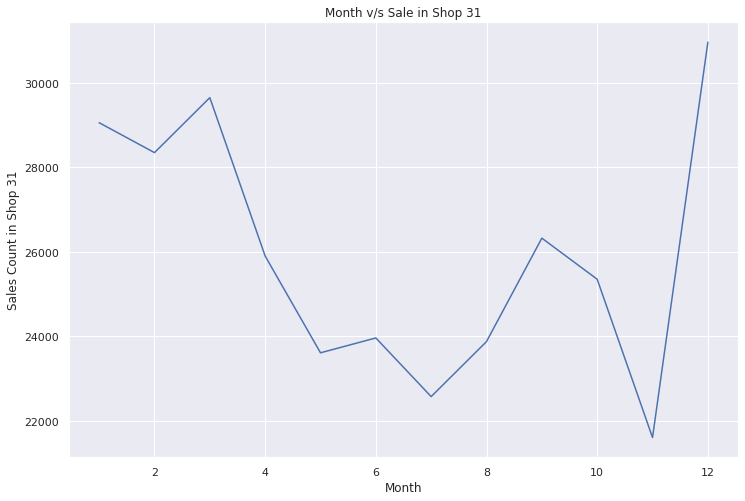

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 31');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 31')
plt.show()

Shop#31 have consistent sale trends for most months with a few months being on the higher side than the rest seeing the peek in December. December being the holiday season explains the spike. Overall there are considerable fluctuations.

##### Shop with Id 25 with second highest revenue

Plotting amount of sales by month for shop with shop id 25 as that is the shop with the second highest revenue.

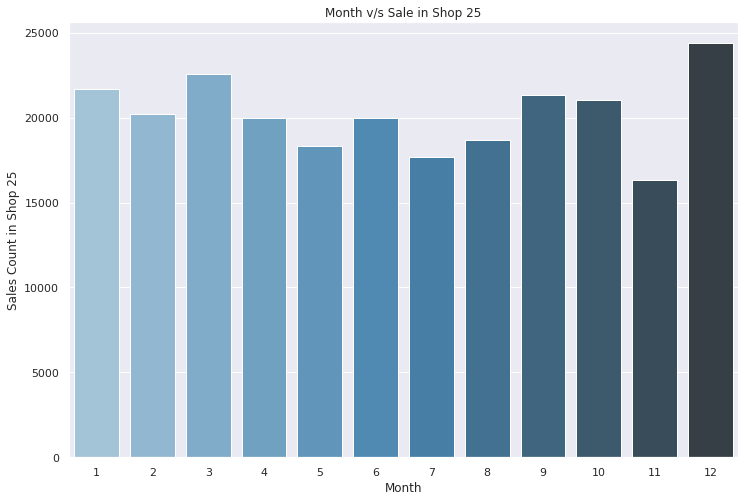

In [ ]:
shop_monthly_groupby = train_df[train_df.shop_id == 25].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 25');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 25')
plt.show()

Line plot for the same:

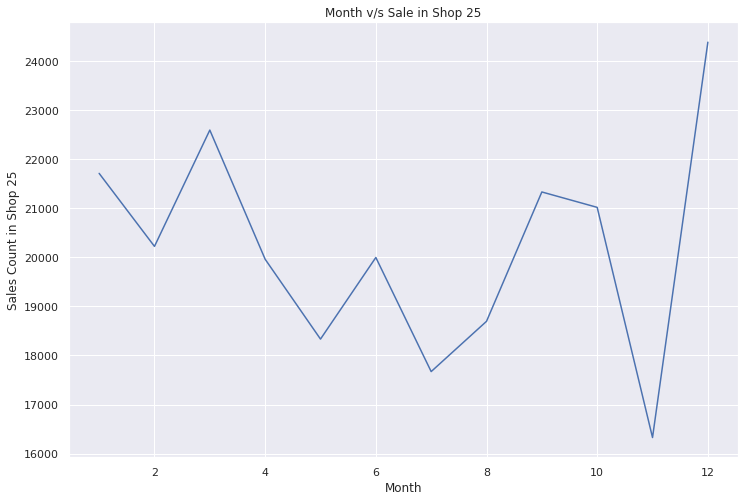

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 25');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 25')
plt.show()

We see similar sale trends for shop#25 as for shop#31 but with a relatively higher fluctuations in the sale counts from month to month for shop#25. The peak is again found to be in December.

##### Shop with Id 28 with third highest revenue

Plotting amount of sales by month for shop with shop id 28 as that is the shop with the third highest revenue.

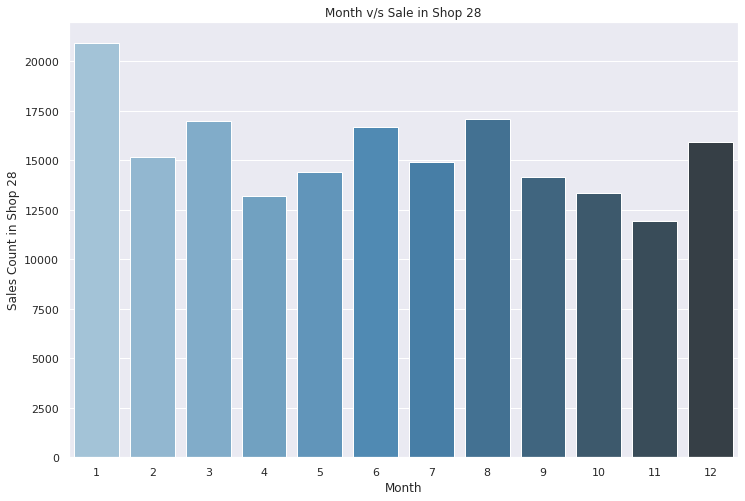

In [ ]:
shop_monthly_groupby = train_df[train_df.shop_id == 28].groupby('month', as_index=False)[['item_cnt_day']].sum()
plt.subplots(figsize=[12,8])
plot = sns.barplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 28');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 28')
plt.show()

Line plot for the same:

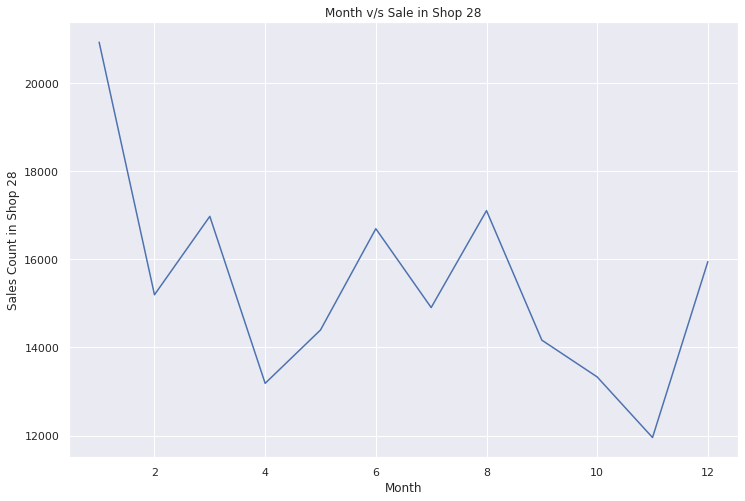

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.lineplot(x='month', y='item_cnt_day', data=shop_monthly_groupby, palette='Blues_d')
plot.set_title('Month v/s Sale in Shop 28');
plot.set(xlabel='Month', ylabel='Sales Count in Shop 28')
plt.show()

Shop#28 sees the most fluctuations through the year and even the peak is not December here but January. Jan is also considered to be a part of holiday season with the new year so the peak seems to be explainable.

## Part 4 - Analyze Price Change

### Finding the range of price for an item within a shop and its cumulative sale

I want to find out the range of prices for items within a shop, assuming that a higher range of price will mean the price change was considerable but may or may not be frequent. I will treat the range as the measuring scale to pick shop-item instances to visualize trends for price changes throughout the duration of the data.

In [ ]:
itemid_groupby = train_df.groupby(['shop_id', 'item_id'], as_index=False).agg({'item_price': np.ptp, 'item_cnt_day' : sum}).reset_index(drop=True)
itemid_groupby.columns = ['shop_id', 'item_id', 'shop_item_price_range', 'shop_item_sale']

In [ ]:
itemid_groupby.sort_values(['shop_item_price_range'], ascending=False).head(10)

,shop_id,item_id,shop_item_price_range,shop_item_sale
64242,12,11365,59076.000,1007.000
149839,24,17717,16745.000,428.000
373314,54,7982,16031.500,18.000
313446,46,7982,15898.000,6.000
138880,22,17717,14888.000,416.000
64247,12,11370,14562.500,6163.000
282331,42,13403,13998.000,4.000
64246,12,11369,13493.571,2688.000
289479,43,6675,12998.000,330.000
156089,25,7983,12600.500,10.000


In [ ]:
len(itemid_groupby)

424098

### Plotting to visualize the impact of price change on item sale within a shop

In [ ]:
train_df['date_copy'] = train_df.index

I will pick the top 3 shop and item_ids pairs with maximum range of price and see how does the sale of that item show impact as the price changes within a shop.


I will be plotting 4 kinds of plots since I figured that plotting the change in price and daily sale together against date was not clearly showing the variations because the price values were much higher and dominating the sale values. 
1. Scatterplot - change in price v/s daily sale (this gives good insights)
2. Line plot - chane in price and daily sale against date (the price value overpowers the sale values thus diminishing variations for sale)
3. Line plot - log of change in price and log of daily sale against date. Taking log still shows the correct variations and brings the scale of both variables to be visible together.
4. Line plot - log of change in price and actual daily sale against date. This may give variations in daily sale to be more visible with clear spikes.

In [ ]:
train_df['log_item_price'] = np.log(train_df['item_price'])
train_df['log_item_cnt_day'] = np.log(train_df['item_cnt_day'])

#### Item#11365 and Shop#12

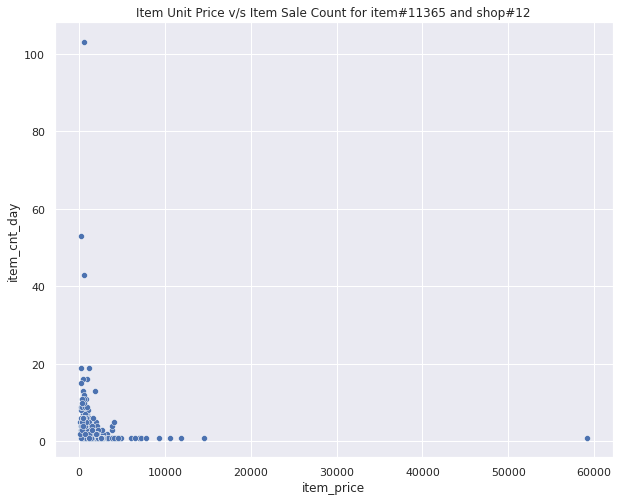

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='item_price', y='item_cnt_day', data=train_df[(train_df.item_id==11365) & (train_df.shop_id==12)].sort_index())
ax.set_title('Item Unit Price v/s Item Sale Count for item#11365 and shop#12')
plt.show()

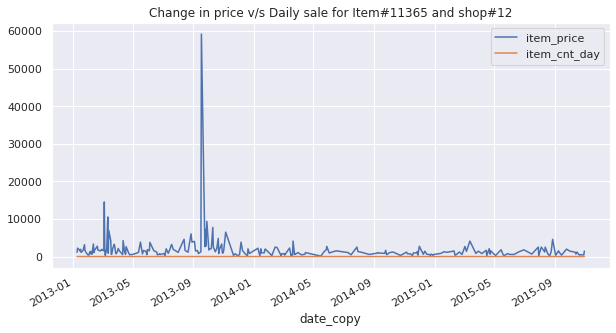

In [ ]:
train_df[(train_df.item_id==11365) & (train_df.shop_id==12)].plot(x='date_copy', y=['item_price', 'item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#11365 and shop#12');

Since item price numnbers are too high as compared to item_cnt_day, we see the change in item_cnt_day as a straight line. So, in order to see the variations, we will take the log of item_price which will still maintain the change in item_price visualization plus give us the liberty to visualize it along with item_cnt_day variations.

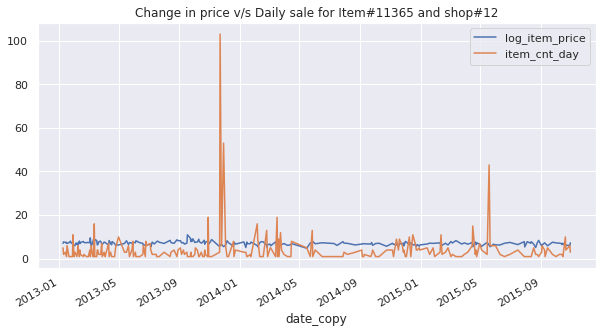

In [ ]:
train_df[(train_df.item_id==11365) & (train_df.shop_id==12)].plot(x='date_copy', y=['log_item_price', 'item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#11365 and shop#12');

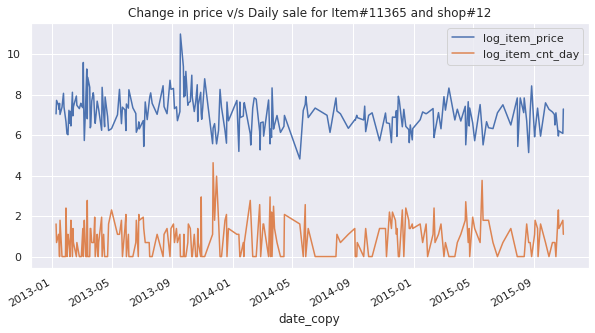

In [ ]:
train_df[(train_df.item_id==11365) & (train_df.shop_id==12)].plot(x='date_copy', y=['log_item_price', 'log_item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#11365 and shop#12');

#### Item#17717 and Shop#24

In [ ]:
temp_df = train_df[(train_df.item_id==17717) & (train_df.shop_id==24)].sort_index()

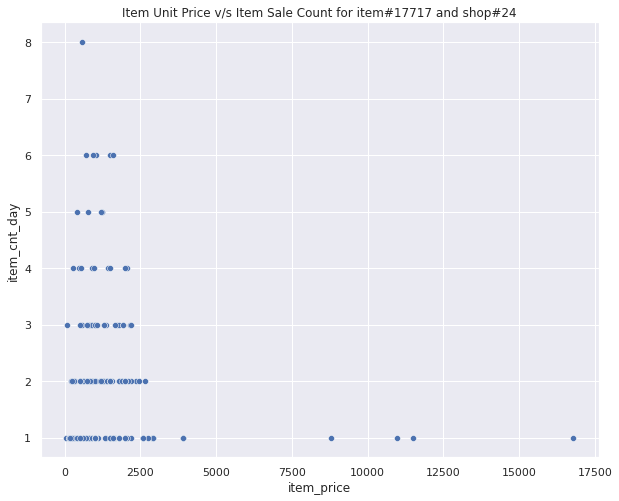

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='item_price', y='item_cnt_day', data=temp_df)
ax.set_title('Item Unit Price v/s Item Sale Count for item#17717 and shop#24')
plt.show()

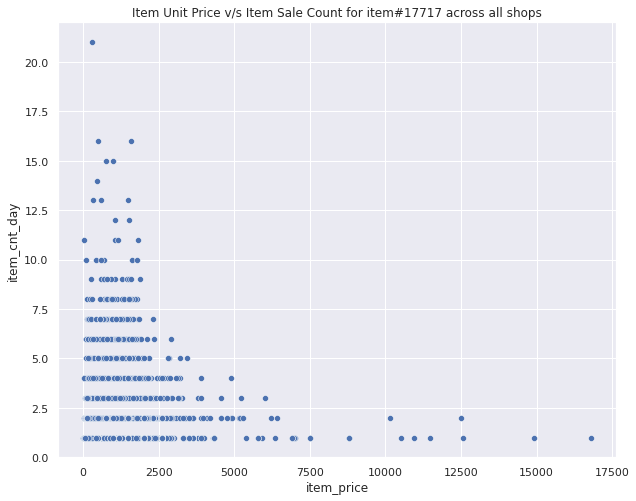

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='item_price', y='item_cnt_day', data=train_df[train_df.item_id==17717].sort_index())
ax.set_title('Item Unit Price v/s Item Sale Count for item#17717 across all shops')
plt.show()

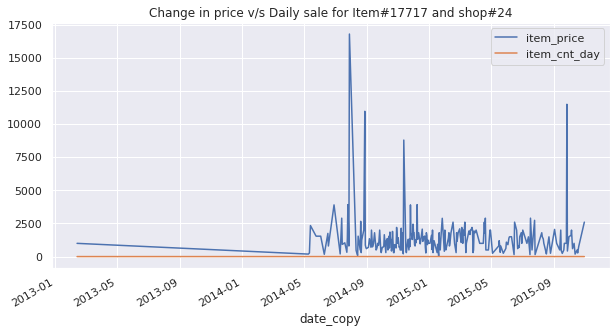

In [ ]:
temp_df.plot(x='date_copy', y=['item_price', 'item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#17717 and shop#24');

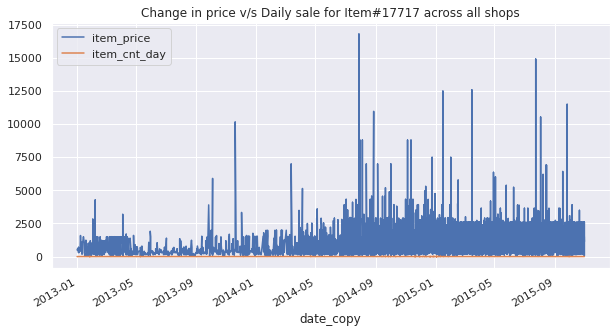

In [ ]:
train_df[train_df.item_id==17717].plot(x='date_copy', y=['item_price', 'item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#17717 across all shops');

Since item price numnbers are too high as compared to item_cnt_day, we see the change in item_cnt_day as a straight line. So, in order to see the variations, we will take the log of item_price which will still maintain the change in item_price visualization plus give us the liberty to visualize it along with item_cnt_day variations.

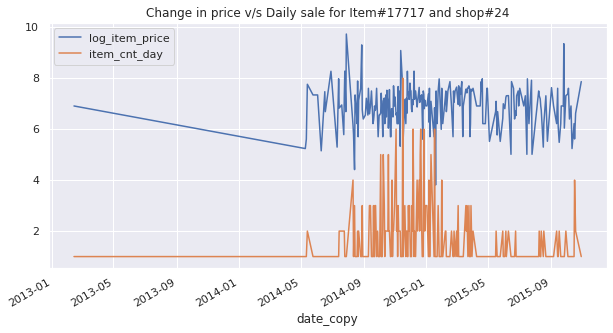

In [ ]:
temp_df.plot(x='date_copy', y=['log_item_price', 'item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#17717 and shop#24');

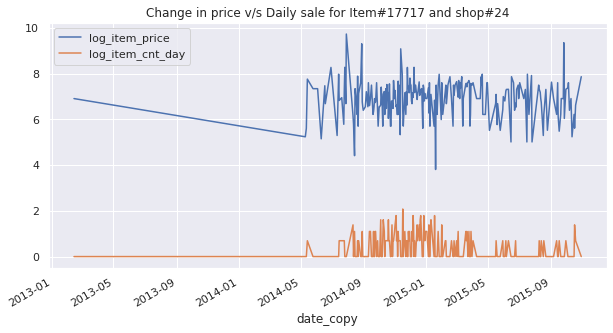

In [ ]:
temp_df.plot(x='date_copy', y=['log_item_price', 'log_item_cnt_day'], figsize=(10,5), title='Change in price v/s Daily sale for Item#17717 and shop#24');

#### Item#7982 and Shop#54

In [ ]:
temp_df = train_df[(train_df.item_id==7982) & (train_df.shop_id==54)].sort_index()
title = 'Item Unit Price v/s Item Sale Count for item#7982 and shop#54'

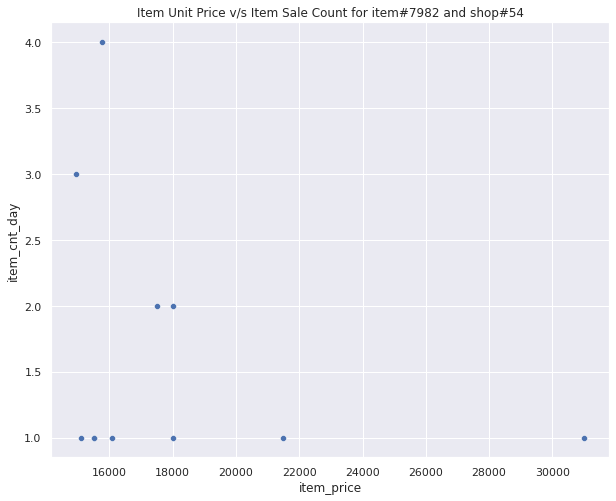

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='item_price', y='item_cnt_day', data=temp_df)
ax.set_title(title)
plt.show()

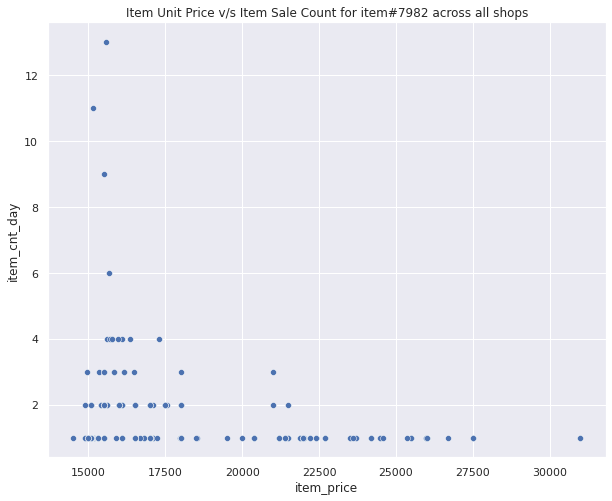

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='item_price', y='item_cnt_day', data=train_df[train_df.item_id==7982].sort_index())
ax.set_title('Item Unit Price v/s Item Sale Count for item#7982 across all shops')
plt.show()

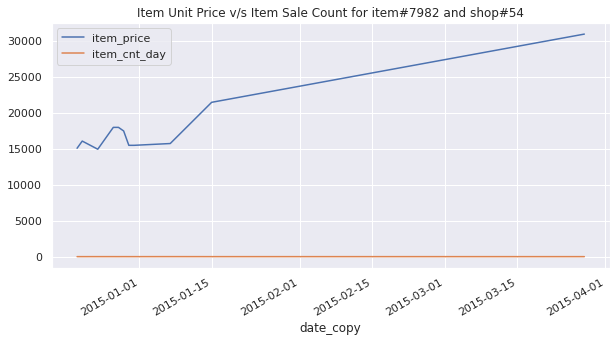

In [ ]:
temp_df.plot(x='date_copy', y=['item_price', 'item_cnt_day'], figsize=(10,5), title=title);

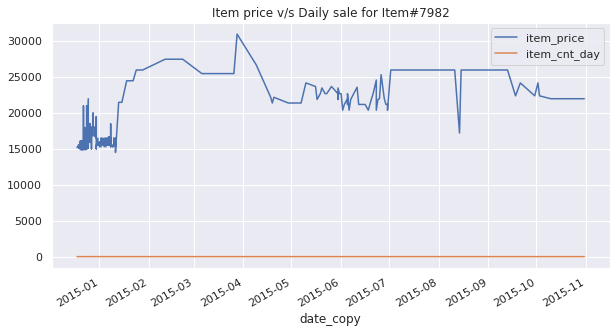

In [ ]:
train_df[train_df.item_id==7982].plot(x='date_copy', y=['item_price', 'item_cnt_day'], figsize=(10,5), title='Item price v/s Daily sale for Item#7982');

Since item price numnbers are too high as compared to item_cnt_day, we see the change in item_cnt_day as a straight line. So, in order to see the variations, we will take the log of item_price which will still maintain the change in item_price visualization plus give us the liberty to visualize it along with item_cnt_day variations.

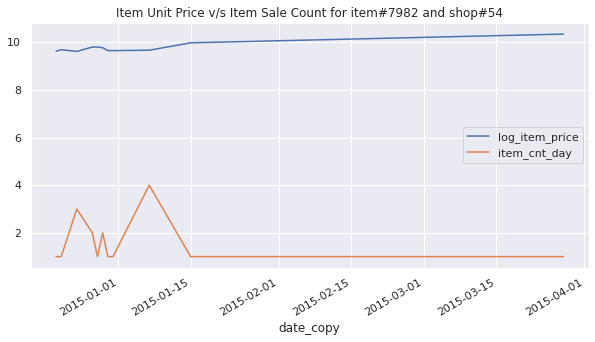

In [ ]:
temp_df.plot(x='date_copy', y=['log_item_price', 'item_cnt_day'], figsize=(10,5), title=title);

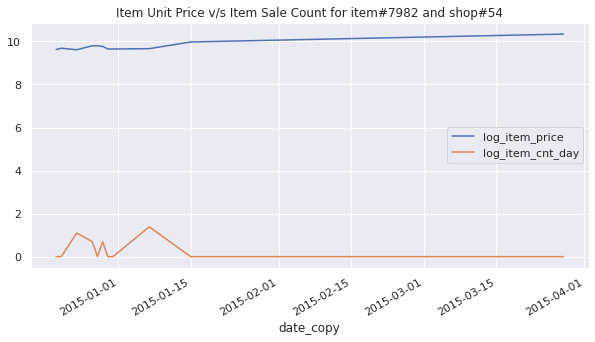

In [ ]:
temp_df.plot(x='date_copy', y=['log_item_price', 'log_item_cnt_day'], figsize=(10,5), title=title);

### Observations

Across the scatter plots for the item-ids within a shop or across all shops, we could see a trend that when the item price was lower the item sale count was higher and when the item price was higher the sale count dropped which also seems to be intuitive. 
However, we could also see certain outliers like for item#11365 we saw an extremely high item sale count which can be attributed to its low price but we cannot tell for sure if the record is authentic or an error. 

Apart from that we can also see that the item sale count for certain items (#17717 and #7982) do not go as high as others (#11365). 

The log-log plot of item price and item sale count also gives us a better look of the variations occurring in both parameters with time. 

I felt log of item price and actual item count against date did bring out the variations in sale clearly with price change for certain graphs but also was ambiguous for certain graphs -- and that seems to be reasonable since we are viewing 2 quantities at different scale which can lead us to give spurious visualizations. I have let those graphs remain here as a proof of learnings. 

### Items with max and min price

In [ ]:
print(train_df['item_price'].max())
print(train_df['item_price'].min())

307980.0
0.07


In [ ]:
train_df[train_df.item_price == 307980.0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total_revenue,day_of_week,day_of_month,month,year,date_copy,log_item_price,log_item_cnt_day
date,,,,,,,,,,,,,,,,,
2013-12-13,11,12,6066,307980.000,1.000,Radmin 3 - 522 лиц.,75,Programs - For Home and Office,Emergency online store,307980.000,4,13,12,2013,2013-12-13,12.638,0.000


In [ ]:
train_df[train_df.item_price == 0.07]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total_revenue,day_of_week,day_of_month,month,year,date_copy,log_item_price,log_item_cnt_day
date,,,,,,,,,,,,,,,,,
2013-06-11,5,6,11864,0.070,1.000,Змей ДЖЕККИ с сердечком 36 см,63,Gifts - Stuffed Toys,"Voronezh (Plekhanovskaya, 13)",0.070,1,11,6,2013,2013-06-11,-2.659,0.000
2013-06-08,5,58,11865,0.070,1.000,Змей МАКС антистресс 33 см.,63,Gifts - Stuffed Toys,"Yakutsk TC ""Central""",0.070,5,8,6,2013,2013-06-08,-2.659,0.000


The items with max and min price have only single entries so we can't comment about their variations.

## Part 5 - Analyze Item Release Time

### Item release dates within the same shop and in any other shop 

If the item was released only in one shop I have used the item release date in other shop for those items to be Nov 1st, 2015 (later than the last day of the records) so that I can get a negative number of days since release in other shops for those items.

In [ ]:
shop_item_groupby = train_df.groupby(['shop_id', 'item_id'], as_index=False).agg({'date_copy': np.min})
shop_item_groupby.columns = ['shop_id', 'item_id', 'shop_item_release_date']

In [ ]:
def find_release_date_in_other_shop(shop_id, item_id):
  return shop_item_groupby[(shop_item_groupby.shop_id != shop_id) & \
                            (shop_item_groupby.item_id == item_id)] \
                            ['shop_item_release_date'].min()

shop_item_groupby['other_shop_item_release_date'] = shop_item_groupby.apply(lambda x: find_release_date_in_other_shop(x.shop_id, x.item_id), axis=1)

In [ ]:
shop_item_groupby.head()

,shop_id,item_id,shop_item_release_date,other_shop_item_release_date
0,0,30,2013-02-15,2013-02-12
1,0,31,2013-02-15,2013-02-12
2,0,32,2013-01-03,2013-01-01
3,0,33,2013-01-03,2013-01-01
4,0,35,2013-01-31,2013-01-23


In [ ]:
release_dates = shop_item_groupby

In [ ]:
release_dates.fillna(pd.to_datetime('01-11-2015', dayfirst=True), inplace=True)
release_dates['other_shop_item_release_date'] = pd.to_datetime(release_dates['other_shop_item_release_date'], dayfirst=True)

In [ ]:
release_dates.head()

,shop_id,item_id,shop_item_release_date,other_shop_item_release_date
0,0,30,2013-02-15,2013-02-12
1,0,31,2013-02-15,2013-02-12
2,0,32,2013-01-03,2013-01-01
3,0,33,2013-01-03,2013-01-01
4,0,35,2013-01-31,2013-01-23


In [ ]:
release_dates.isnull().sum()

shop_id                         0
item_id                         0
shop_item_release_date          0
other_shop_item_release_date    0
dtype: int64

Saving all release dates as a csv because the above operations are time consuming -- uncomment the code to use it.

In [ ]:
# give your directory to save
# save_dir = "drive/My Drive/CSE_519/HW1/all_release_dates.csv"
# release_dates.to_csv(save_dir)

In [ ]:
# The following code is to read and operate on the release_dates dataframe from the saved csv


# all_release_dates = pd.read_csv("drive/My Drive/CSE_519/HW1/all_release_dates.csv")
# all_release_dates.drop(columns=['Unnamed: 0'], inplace=True)
# all_release_dates.fillna(pd.to_datetime('01-11-2015', dayfirst=True), inplace=True)
# all_release_dates['other_shop_item_release_date'] = pd.to_datetime(all_release_dates['other_shop_item_release_date'], dayfirst=True)

### Finding the number of days since release within the same shop and in any other shop

In [ ]:
release_time_sales = train_df[['shop_id', 'item_id', 'item_cnt_day', 'date_copy']]

In [ ]:
release_time_sales = release_time_sales.merge(release_dates, on=['shop_id', 'item_id'], how='left')

In [ ]:
release_time_sales.head()

,shop_id,item_id,item_cnt_day,date_copy,shop_item_release_date,other_shop_item_release_date
0,59,22154,1.000,2013-01-02,2013-01-02,2013-01-02
1,25,2552,1.000,2013-01-03,2013-01-03,2013-04-25
2,25,2554,1.000,2013-01-06,2013-01-06,2015-11-01
3,25,2555,1.000,2013-01-15,2013-01-15,2013-01-06
4,25,2564,1.000,2013-01-10,2013-01-10,2013-01-05


In [ ]:
release_time_sales['days_since_release_within_shop'] = (release_time_sales['date_copy'] - release_time_sales['shop_item_release_date']).dt.days
release_time_sales['days_since_release_in_other_shop'] = (release_time_sales['other_shop_item_release_date'] - release_time_sales['date_copy']).dt.days

In [ ]:
release_time_sales = release_time_sales[['shop_id', 'item_id', 'item_cnt_day', 'days_since_release_within_shop', 'days_since_release_in_other_shop']]

In [ ]:
release_time_sales.head()

,shop_id,item_id,item_cnt_day,days_since_release_within_shop,days_since_release_in_other_shop
0,59,22154,1.000,0,0
1,25,2552,1.000,0,112
2,25,2554,1.000,0,1029
3,25,2555,1.000,0,-9
4,25,2564,1.000,0,-5


### Plotting to visualize the impact of item release time on item sale

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_within_shop', y='item_cnt_day', data=release_time_sales)
ax.set_title('Item Release Time within shop v/s Item Sale Count')
plt.show()

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_in_other_shop', y='item_cnt_day', data=release_time_sales)
ax.set_title('Item Release Time in other shop v/s Item Sale Count')
plt.show()

#### Plotting for a few shops

In [ ]:
release_time_sales.sort_values(['shop_id', 'days_since_release_within_shop'], ascending=False)

,shop_id,item_id,item_cnt_day,days_since_release_within_shop,days_since_release_in_other_shop
2891804,59,7893,1.000,1032,-1033
2892295,59,5822,1.000,1032,-1033
2892362,59,5811,1.000,1032,-1033
2892046,59,2308,3.000,1031,-1033
2891925,59,15256,1.000,1030,-1032
...,...,...,...,...,...
182681,0,12772,1.000,0,-12
182683,0,12755,1.000,0,-38
182694,0,13536,1.000,0,-10
182729,0,13469,1.000,0,-14


In [ ]:
release_time_sales.sort_values(['shop_id', 'days_since_release_in_other_shop'], ascending=False)

,shop_id,item_id,item_cnt_day,days_since_release_within_shop,days_since_release_in_other_shop
77724,59,6924,1.000,0,1030
78035,59,4269,1.000,0,1030
78261,59,18018,1.000,0,1020
132058,59,4426,1.000,0,990
333462,59,2260,1.000,0,972
...,...,...,...,...,...
181363,0,6490,1.000,51,-58
181626,0,14931,1.000,20,-58
182105,0,12286,1.000,54,-58
182174,0,12168,1.000,31,-58


##### Shop#59 plot

In [ ]:
rt_59 = release_time_sales[release_time_sales.shop_id == 59]
len(rt_59)

41971

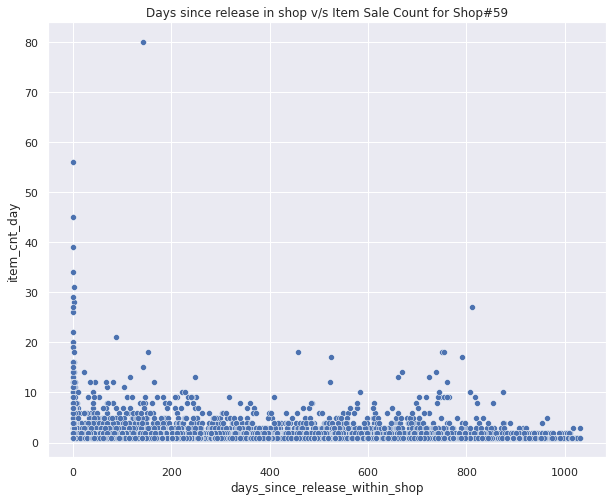

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_within_shop', y='item_cnt_day', data=rt_59)
ax.set_title('Days since release in shop v/s Item Sale Count for Shop#59')
plt.show()

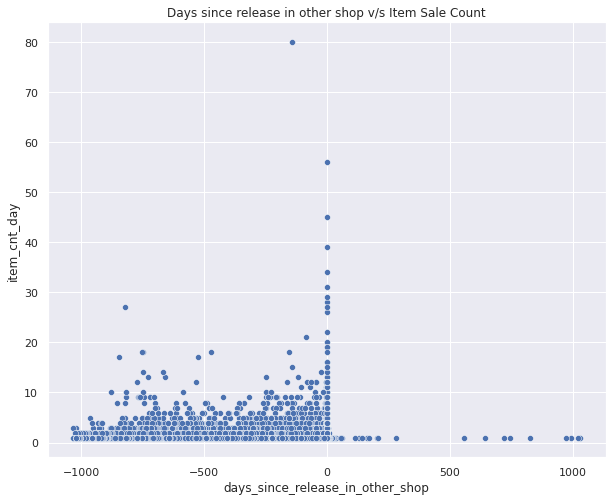

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_in_other_shop', y='item_cnt_day', data=rt_59)
ax.set_title('Days since release in other shop v/s Item Sale Count')
plt.show()

##### Shop#58 plot

In [ ]:
rt_58 = release_time_sales[release_time_sales.shop_id == 58]
len(rt_58)

71268

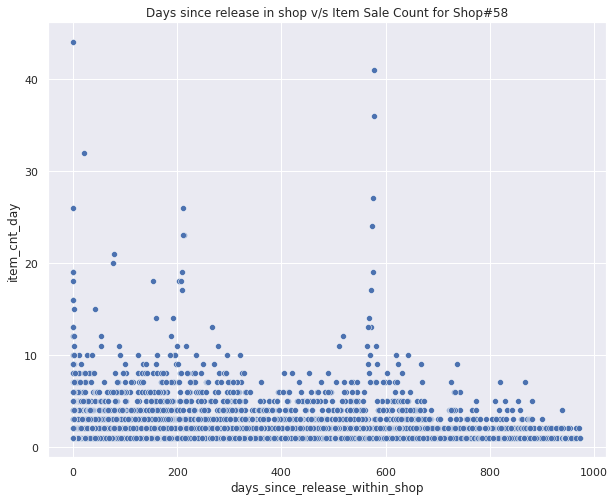

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_within_shop', y='item_cnt_day', data=rt_58)
ax.set_title('Days since release in shop v/s Item Sale Count for Shop#58')
plt.show()

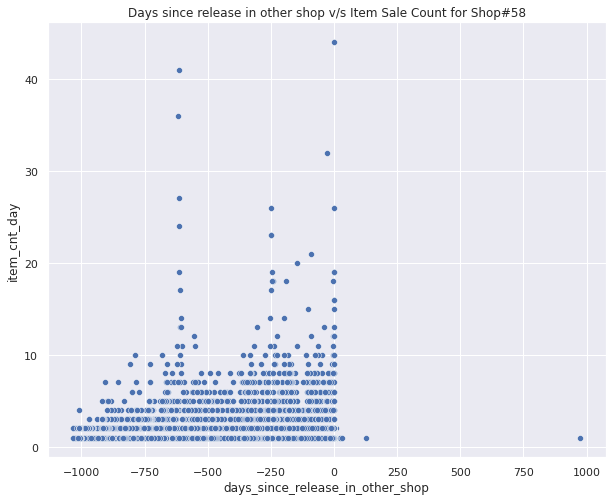

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_in_other_shop', y='item_cnt_day', data=rt_58)
ax.set_title('Days since release in other shop v/s Item Sale Count for Shop#58')
plt.show()

##### Shop#57 plot

In [ ]:
rt_57 = release_time_sales[release_time_sales.shop_id == 57]
len(rt_57)

117114

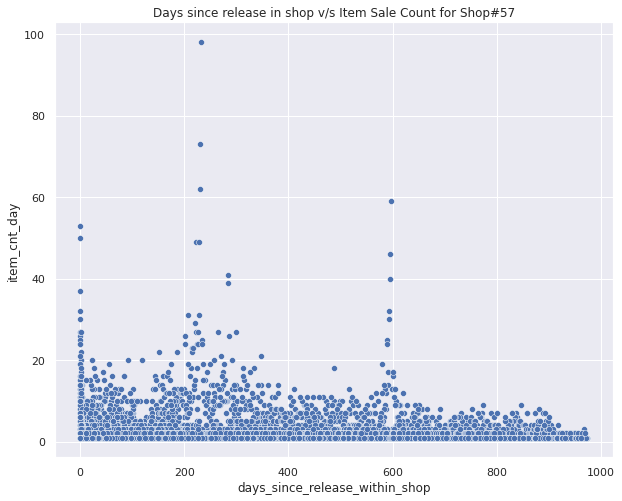

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_within_shop', y='item_cnt_day', data=rt_57)
ax.set_title('Days since release in shop v/s Item Sale Count for Shop#57')
plt.show()

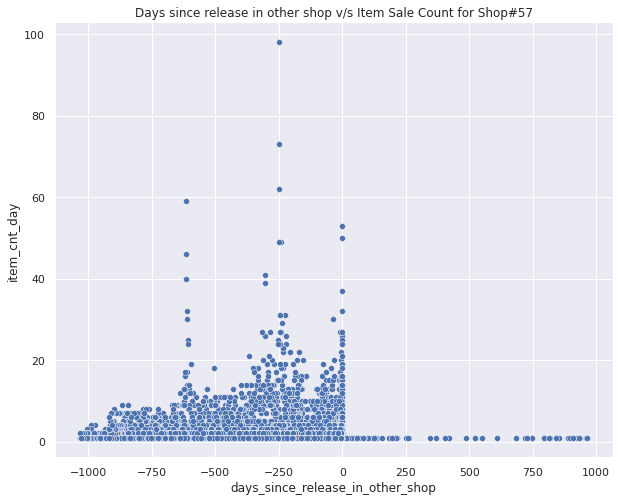

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='days_since_release_in_other_shop', y='item_cnt_day', data=rt_57)
ax.set_title('Days since release in other shop v/s Item Sale Count for Shop#57')
plt.show()

#### Correlation between item release time and item sale

In [ ]:
release_time_sales['days_since_release_within_shop'].corr(release_time_sales['item_cnt_day'])

-0.0034231273744730977

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


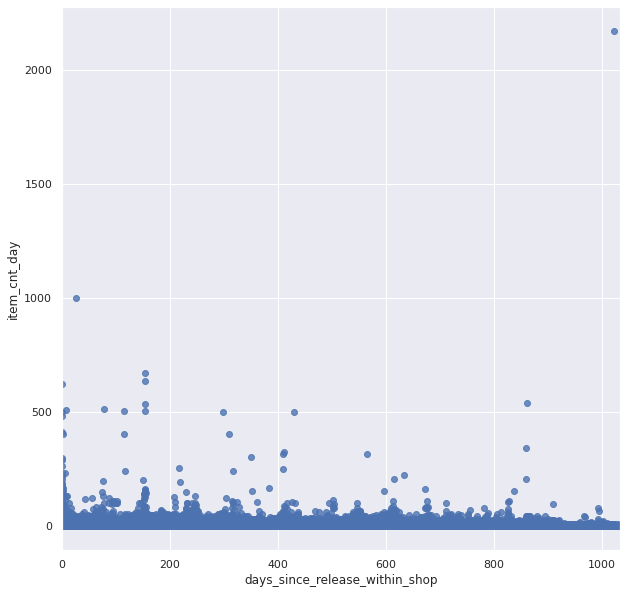

In [ ]:
# commenting out as it takes a long time to plot the line of best fit with the regplot

# sns.regplot(release_time_sales['days_since_release_within_shop'], release_time_sales['item_cnt_day'])

In [ ]:
release_time_sales['days_since_release_in_other_shop'].corr(release_time_sales['item_cnt_day'])

0.024693761816859932

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


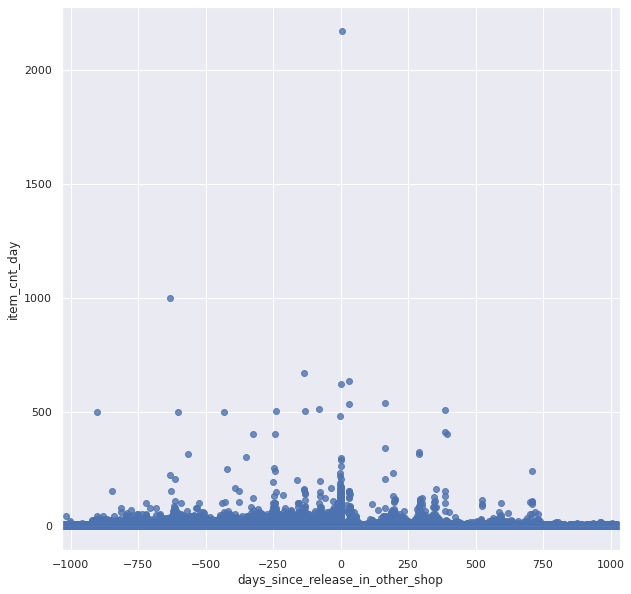

In [ ]:
# commenting out as it takes a long time to plot the line of best fit with the regplot

# sns.regplot(release_time_sales['days_since_release_in_other_shop'], release_time_sales['item_cnt_day'])

### Observations

The correlation coefficients and the line of best fit visualizations between Time since release (within shop and other shop) v/s Sale count show that there may not be much of a correlation in general. 

However, when I plotted scatterplots for a few shops to see the relations between time since release and the sale count, I was able to see certain trends. For example, if the items were not released in other shop (i.e. the days since release in other shop was negative), the sale count seemed to be more populated and dominated in that shop but as we went towards positive numbers on the x-axis which denoted that some days had passed since the release of the item in other shops, the density of sale count in that shop decresed drastically which implies that the amount of sale would have also fallen if we have to aggregate the sale count points. 

The density plot for time since release within the shop and the sale count everyday also gave some interesting insights -- like when the item is newly released or is not old enough in the shop the sale count oer day tend to be higher but certain shops like #58 and #57 showed a surge in a couple of intervals too where we can see the per day sale count to shoot up - possibly because the item might have gone out of stock for some time and when it came back it had huge demand and per day sales shot up. 


In general, we can see as more and more time passed since release of the items, the per day sale count points tend to drop to the lower side. 

### Verification solution for release dates (Commented out)

In [ ]:
# shop_item_groupby = train_df.groupby(['item_id', 'shop_id']).agg({'date_copy': np.min})
# shop_item_groupby.columns = ['shop_item_release_date']

In [ ]:
# shop_item_groupby

In [ ]:
# release_dates = pd.DataFrame()
# for item_id, data in shop_item_groupby.groupby(level=0):
#   data = data.reset_index()
#   if (len(data) >1 ):
#     data['other_shop_release'] = data.apply(lambda x: data[data.shop_id != x.shop_id].groupby('item_id')['shop_item_release_date'].min(), axis=1)
#   else:
#     data['other_shop_release'] = pd.to_datetime('01-11-2015', dayfirst=True) 
#   release_dates = release_dates.append(data.copy())


In [ ]:
# release_dates

In [ ]:
# release_dates.to_csv("drive/My Drive/CSE_519/HW1/release_dates.csv")

## Part 6 - Interesting Plot

### Idea and plots

I am trying to see the number of days an item has been in the market and the amount of sales it has resulted in -- trying to find if there is any trend between the two.

And, I want to do this for number of days the items are available across the market as well as within a shop. 

I will calculate the number of days in market/shop by calculating the number of days between first sale date and last date in the market/shop respectively.

In [ ]:
item_release_groupby = train_df.groupby('item_id', as_index=False).agg({'date_copy': np.ptp, 'item_cnt_day': sum})
item_release_groupby.columns = ['item_id', 'number_of_days_in_market', 'sale_count']
item_release_groupby['number_of_days_in_market'] = (item_release_groupby['number_of_days_in_market']).dt.days
item_release_groupby.sort_values(['number_of_days_in_market', 'sale_count'], ascending=False)

,item_id,number_of_days_in_market,sale_count
2749,2808,1033,17255.000
17416,17717,1033,15830.000
5717,5822,1033,14522.000
7698,7856,1033,9016.000
2263,2308,1033,7598.000
...,...,...,...
21745,22110,0,1.000
21772,22138,0,1.000
21792,22158,0,1.000
21795,22161,0,1.000


Market duration trend:

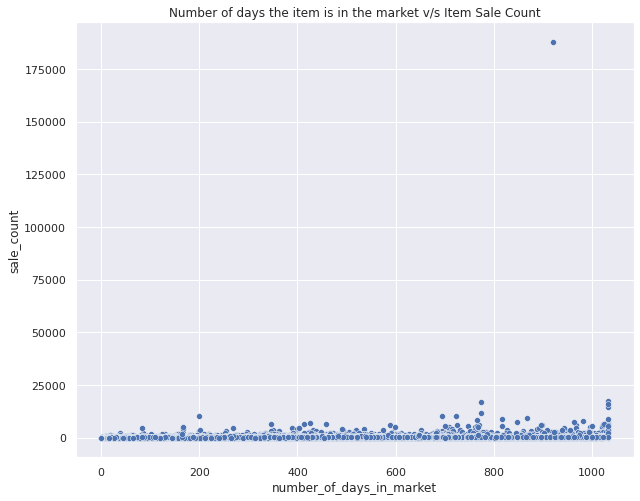

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='number_of_days_in_market', y='sale_count', data=item_release_groupby)
ax.set_title('Number of days the item is in the market v/s Item Sale Count')
plt.show()

In [ ]:
shopwise_item_release_groupby = train_df.groupby(by = ['shop_id', 'item_id'], as_index=False).agg({'date_copy': np.ptp, 'item_cnt_day': sum})
shopwise_item_release_groupby.columns = ['shop_id', 'item_id', 'number_of_days_in_shop', 'shop_sale_count']
shopwise_item_release_groupby['number_of_days_in_shop'] = (shopwise_item_release_groupby['number_of_days_in_shop']).dt.days
shopwise_item_release_groupby.sort_values(['number_of_days_in_shop', 'shop_sale_count'], ascending=False)

,shop_id,item_id,number_of_days_in_shop,shop_sale_count
80879,15,2808,1033,420.000
112844,19,2808,1033,371.000
45217,7,7856,1033,165.000
80069,14,22088,1033,112.000
256004,37,22088,1033,87.000
...,...,...,...,...
424080,59,22118,0,1.000
424088,59,22144,0,1.000
424092,59,22153,0,1.000
424093,59,22154,0,1.000


Shop duration trend:

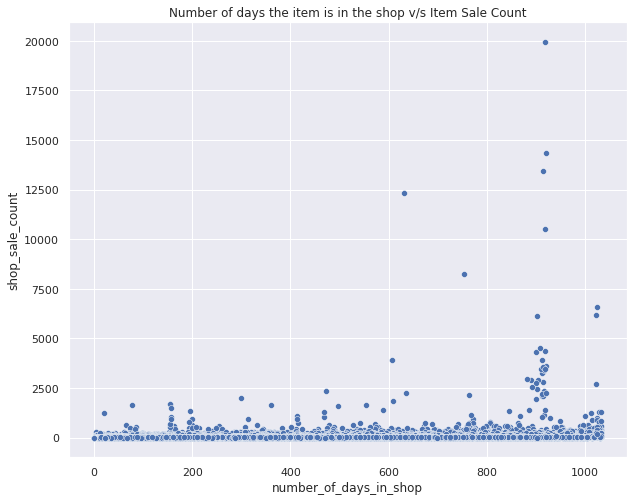

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='number_of_days_in_shop', y='shop_sale_count', data=shopwise_item_release_groupby)
ax.set_title('Number of days the item is in the shop v/s Item Sale Count')
plt.show()

### Observations

The plots of item duration across the market and within shops have similar trend for most items but there is a considerable difference for many items too. The count had a huge difference by a factor of almost 10 but that is understandable since within shop sale count should ideally be a smaller number than the sale count across the market if the same item is being sold in multiple shops.
For the maket trends, most of the item sale remained within 25000 count while for shop it was the 2500 mark. 

But we can see one outlier in the market trend with a whopping count of more than 175000 and a little less than 1000 days in the market -- by the sale count this looks like to be a data error but we can't tell for sure. 

Shop trends show many items having larger sale count when they have been in the shop for a longer period of time. Yet there are items which show similar sale count as those that have been in the shop for a shorter duration.

Even for market trends, those within the 25000 marks have this characteristic of items with different durations in the market having similar sale counts.

I think there must be certain items that tend to keep selling as long as they are in the market and don't overgrow the demand, thus the sale count gradually keeps increasing. Also, there might be certain items that have high demand so as soon as they are in the market they might show higher sale even though they fade out of the market soon. 

Since the shop trends showed some interesting variations, I am going to further analyze the shop trends by picking certain shops individually.

### Picking a few shops and plotting for them the trend of item duration and sale in that shop.

In [ ]:
shopwise_item_release_groupby.sort_values(['shop_id', 'number_of_days_in_shop'], ascending=False)

,shop_id,item_id,number_of_days_in_shop,shop_sale_count
418488,59,5811,1032,71.000
418496,59,5822,1032,254.000
419221,59,7893,1032,64.000
417306,59,2308,1031,217.000
421747,59,15256,1030,38.000
...,...,...,...,...
3587,0,22091,0,1.000
3591,0,22131,0,1.000
3594,0,22138,0,1.000
3595,0,22139,0,1.000


#### Shop#59 plot

In [ ]:
temp_df_59 = shopwise_item_release_groupby[shopwise_item_release_groupby.shop_id == 59]

In [ ]:
len(temp_df_59)

7335

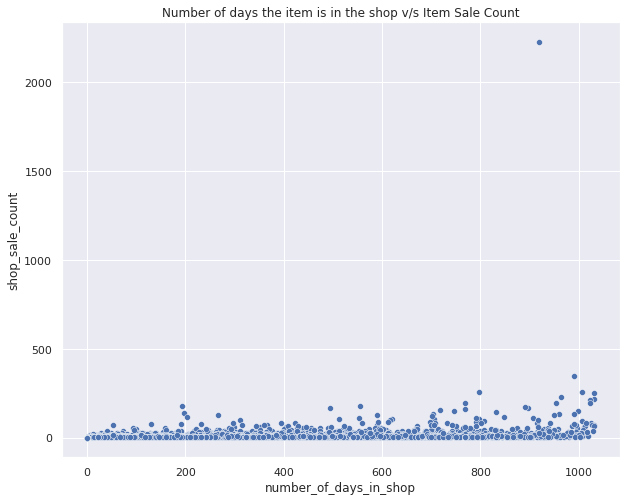

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='number_of_days_in_shop', y='shop_sale_count', data=temp_df_59)
ax.set_title('Number of days the item is in the shop v/s Item Sale Count')
plt.show()

#### Shop#58 plot

In [ ]:
shopwise_item_release_groupby[shopwise_item_release_groupby.shop_id != 59].sort_values(['shop_id', 'number_of_days_in_shop'], ascending=False)

,shop_id,item_id,number_of_days_in_shop,shop_sale_count
408959,58,2445,974,88.000
411458,58,9565,974,53.000
413861,58,15256,974,37.000
414308,58,16167,974,53.000
408484,58,1007,973,44.000
...,...,...,...,...
3587,0,22091,0,1.000
3591,0,22131,0,1.000
3594,0,22138,0,1.000
3595,0,22139,0,1.000


In [ ]:
temp_df_58 = shopwise_item_release_groupby[shopwise_item_release_groupby.shop_id == 58]
len(temp_df_58)

8393

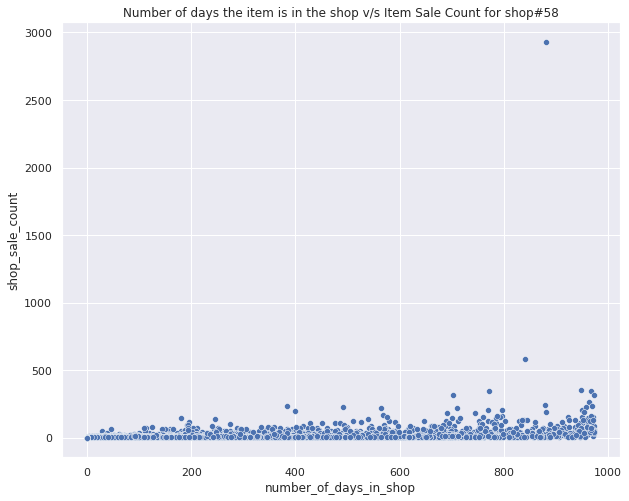

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='number_of_days_in_shop', y='shop_sale_count', data=temp_df_58)
ax.set_title('Number of days the item is in the shop v/s Item Sale Count for shop#58')
plt.show()

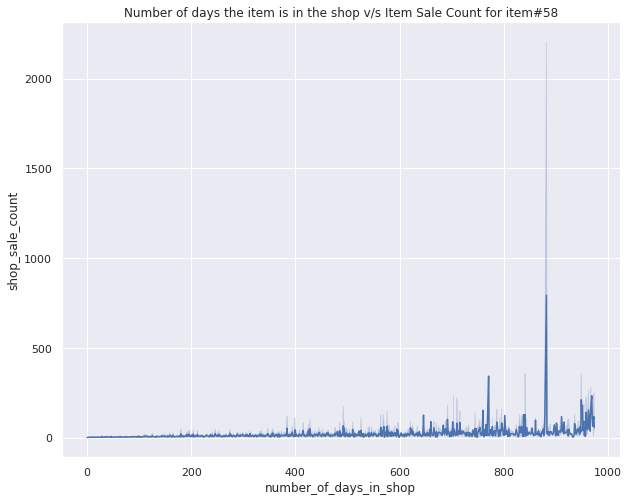

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.lineplot(x='number_of_days_in_shop', y='shop_sale_count', data=temp_df_58)
ax.set_title('Number of days the item is in the shop v/s Item Sale Count for item#58')
plt.show()

#### Shop#57 plot

In [ ]:
shopwise_item_release_groupby[~shopwise_item_release_groupby['shop_id'].isin([59, 58])].sort_values(['shop_id', 'number_of_days_in_shop'], ascending=False)

,shop_id,item_id,number_of_days_in_shop,shop_sale_count
402865,57,12970,974,33.000
396944,57,2308,973,217.000
397363,57,3141,973,78.000
397621,57,3676,973,111.000
399668,57,7893,973,265.000
...,...,...,...,...
3587,0,22091,0,1.000
3591,0,22131,0,1.000
3594,0,22138,0,1.000
3595,0,22139,0,1.000


In [ ]:
temp_df_57 = shopwise_item_release_groupby[shopwise_item_release_groupby.shop_id == 57]
len(temp_df_57)

12281

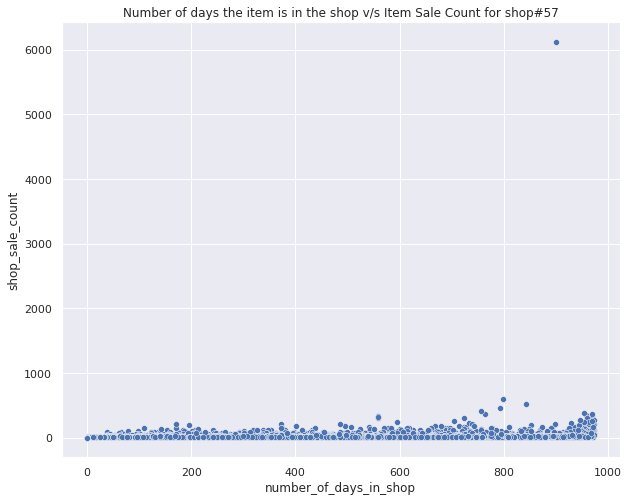

In [ ]:
plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='number_of_days_in_shop', y='shop_sale_count', data=temp_df_57)
ax.set_title('Number of days the item is in the shop v/s Item Sale Count for shop#57')
plt.show()

#### Observations

With the further analysis of specific shops, the observations I had earlier get strengthened. 
The hand-picked shops show similar trends of sale with the duration of item in the shop as we have discussed earlier.

## Part 7 - Prediction Model

### Reading Test data

In [ ]:
test = pd.read_csv(parent_dir+'test.csv')
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
sample_submission = pd.read_csv(parent_dir+'sample_submission.csv')

In [ ]:
sample_submission

,ID,item_cnt_month
0,0,0.500
1,1,0.500
2,2,0.500
3,3,0.500
4,4,0.500
...,...,...
214195,214195,0.500
214196,214196,0.500
214197,214197,0.500
214198,214198,0.500


In [ ]:
test.merge(train_df, how='left', on=['shop_id', 'item_id'])['item_cnt_day'].count()

1221498

### Data Pre-processing

#### Data Cleaning

Carving out training dataset with only the relevant columns

In [ ]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_name', 'item_category_id', 'item_category_name', 'shop_name',
       'total_revenue', 'day_of_week', 'day_of_month', 'month', 'year',
       'date_copy', 'log_item_price', 'log_item_cnt_day'],
      dtype='object')

In [ ]:
tr_data = train_df[['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [ ]:
tr_data.head()

,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
date,,,,,,
2013-01-02,0,59,37,22154,999.000,1.000
2013-01-03,0,25,58,2552,899.000,1.000
2013-01-06,0,25,58,2554,1709.050,1.000
2013-01-15,0,25,56,2555,1099.000,1.000
2013-01-10,0,25,59,2564,349.000,1.000


In [ ]:
tr_data.shape

(2928492, 6)

Filtering data to retain only the shop_ids and item_ids present in test set

In [ ]:
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
tr_data = tr_data[tr_data['shop_id'].isin(test_shop_ids)]
tr_data = tr_data[tr_data['item_id'].isin(test_item_ids)]

In [ ]:
tr_data.shape

(1221498, 6)

#### Creating monthly train data since we are supposed to predict next month's sale

Since we need to make monthly sale prediction, creating a new column for aggregate monthly sales of every item for all shops, item categories and item combos respectively.

In [ ]:
tr_data_monthly = tr_data.groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False).agg({'item_cnt_day': ['sum', 'mean', 'count'], 'item_price': ['sum', 'mean']})

In [ ]:
tr_data_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_cnt_month', 'mean_item_cnt_month', 'transactions', 'item_price_sum', 'item_price_mean']

In [ ]:
tr_data_monthly['item_unit_price'] = tr_data_monthly['item_price_sum']/tr_data_monthly['transactions']

In [ ]:
tr_data_monthly.head()

,date_block_num,shop_id,item_category_id,item_id,item_cnt_month,mean_item_cnt_month,transactions,item_price_sum,item_price_mean,item_unit_price
0,0,2,2,5572,9.000,1.286,7,10730.000,1532.857,1532.857
1,0,2,2,5643,1.000,1.000,1,2390.000,2390.000,2390.000
2,0,2,5,5583,2.000,1.000,2,1188.300,594.150,594.150
3,0,2,6,7893,3.000,1.000,3,5970.000,1990.000,1990.000
4,0,2,6,7894,1.000,1.000,1,1490.000,1490.000,1490.000


#### Extrapolating missing record

We have been told that the list of shops and products slightly changes every month, so in order to make our model robust, we are going to create an entry for every possible combination of date_block_num, shop_id and item_id for all the shop_id, item_id pairs that exist in the test data.

And, since we had restricted our training data to contain unique shops and unique items from test alone, we can simply use our monthly train data (tr_data_monthly) to extrapolate the missing records.

In [ ]:
shop_ids = tr_data_monthly['shop_id'].unique()
item_ids = tr_data_monthly['item_id'].unique()
num_months = tr_data_monthly['date_block_num'].nunique()
superset = []
for i in range(num_months):
  for s in shop_ids:
    for item in item_ids:
      superset.append([i, s, item])

superset = pd.DataFrame(superset, columns=['date_block_num', 'shop_id', 'item_id'])


In [ ]:
superset.shape

(6734448, 3)

Merging the training data with the superset

In [ ]:
tr_data_monthly = superset.merge(tr_data_monthly, how='outer', on=['date_block_num', 'shop_id', 'item_id'])
tr_data_monthly.fillna(0, inplace=True)

In [ ]:
tr_data_monthly

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month,mean_item_cnt_month,transactions,item_price_sum,item_price_mean,item_unit_price
0,0,2,5572,2.000,9.000,1.286,7.000,10730.000,1532.857,1532.857
1,0,2,5643,2.000,1.000,1.000,1.000,2390.000,2390.000,2390.000
2,0,2,5583,5.000,2.000,1.000,2.000,1188.300,594.150,594.150
3,0,2,7893,6.000,3.000,1.000,3.000,5970.000,1990.000,1990.000
4,0,2,7894,6.000,1.000,1.000,1.000,1490.000,1490.000,1490.000
...,...,...,...,...,...,...,...,...,...,...
6734443,33,36,9103,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734444,33,36,9107,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734445,33,36,5704,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734446,33,36,12733,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### Removing outliers

In [ ]:
tr_data_monthly.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id',
       'item_cnt_month', 'mean_item_cnt_month', 'transactions',
       'item_price_sum', 'item_price_mean', 'item_unit_price'],
      dtype='object')

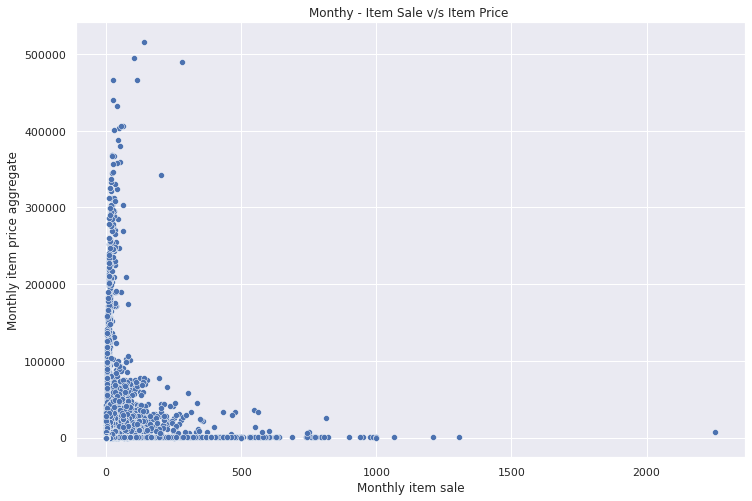

In [ ]:
plt.subplots(figsize=[12,8])
plot = sns.scatterplot(x='item_cnt_month', y='item_price_sum', data=tr_data_monthly)
plot.set_title('Monthy - Item Sale v/s Item Price ')
plot.set(xlabel='Monthly item sale', ylabel='Monthly item price aggregate')
plt.show()


Let's try to remove certain outliers:
Let's pick any monthly item sale > 20 and monthly price > 400000 as outliers because I don't want to predict for items that are not sold frequent enough with a high price tag that it has. It might skew my prediction model. 

In [ ]:
tr_data_monthly = tr_data_monthly[(tr_data_monthly.item_cnt_month <= 20) & (tr_data_monthly.item_price_sum < 400000)]

** Used the above idea (choosing the threshold for removing outliers) from the notebook in my references

#### Creating train data label

In [ ]:
tr_data_monthly['item_cnt_next_month'] = tr_data_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt_month'].shift(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tr_data_monthly.sort_values(['shop_id', 'item_id', 'date_block_num']).tail(10)

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month,mean_item_cnt_month,transactions,item_price_sum,item_price_mean,item_unit_price,item_cnt_next_month
4906038,24,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5104110,25,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5302182,26,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5500254,27,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5698326,28,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5896398,29,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6094470,30,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6292542,31,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6490614,32,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6688686,33,59,22167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan


Filling the nans of next month predictions with the same values as in current month

In [ ]:
tr_data_monthly.isnull().sum()

date_block_num              0
shop_id                     0
item_id                     0
item_category_id            0
item_cnt_month              0
mean_item_cnt_month         0
transactions                0
item_price_sum              0
item_price_mean             0
item_unit_price             0
item_cnt_next_month    198071
dtype: int64

In [ ]:
tr_data_monthly.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
tr_data_monthly.tail(10)

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month,mean_item_cnt_month,transactions,item_price_sum,item_price_mean,item_unit_price,item_cnt_next_month
6734438,33,36,15499,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734439,33,36,1819,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734440,33,36,3409,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734441,33,36,7717,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734442,33,36,10204,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734443,33,36,9103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734444,33,36,9107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734445,33,36,5704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734446,33,36,12733,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6734447,33,36,15925,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
tr_data_monthly.isnull().sum()

date_block_num         0
shop_id                0
item_id                0
item_category_id       0
item_cnt_month         0
mean_item_cnt_month    0
transactions           0
item_price_sum         0
item_price_mean        0
item_unit_price        0
item_cnt_next_month    0
dtype: int64

We made sure all nans were replaced by current month's values

#### Adding more features


---





Item-wise min, max

In [ ]:
item_price_groupby = tr_data_monthly.groupby(['item_id'], as_index=False).agg({'item_unit_price': [np.min, np.max, np.mean]})

In [ ]:
item_price_groupby.columns = ['item_id', 'overall_item_min_price', 'overall_item_max_price', 'overall_item_mean_price']

Merging with monthly train data

In [ ]:
tr_data_monthly = tr_data_monthly.merge(item_price_groupby, on='item_id', how='left')


Price change for each item with respect to its overall min and max value.

In [ ]:
tr_data_monthly['price_decrease'] = tr_data_monthly['overall_item_max_price'] - tr_data_monthly['item_unit_price']
tr_data_monthly['price_increase'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['overall_item_min_price']
tr_data_monthly['price_diff_by_mean'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['overall_item_mean_price']

Creating feature by Shifting price

In [ ]:
tr_data_monthly['item_cnt_month_shifted1'] = tr_data_monthly.sort_values('date_block_num') \
                                                  .groupby(['shop_id', 'item_category_id', 'item_id']) \
                                                  ['item_cnt_month'].shift(1)

tr_data_monthly['item_cnt_month_shifted2'] = tr_data_monthly.sort_values('date_block_num') \
                                                  .groupby(['shop_id', 'item_category_id', 'item_id']) \
                                                  ['item_cnt_month'].shift(2)

tr_data_monthly['item_cnt_month_shifted3'] = tr_data_monthly.sort_values('date_block_num') \
                                                  .groupby(['shop_id', 'item_category_id', 'item_id']) \
                                                  ['item_cnt_month'].shift(3)                                                                                                    

tr_data_monthly.fillna(0, inplace=True)                                          

Item price trend by subtracting the 3 shifted prices from each row dividing by 4 (current month + 3 shifted month's prices are taken into account that's why). This will give us an idea of the price varies consecutively, here we stick to 3 consecutive months.


** Used this idea (Shifting price features) from the notebook in my references but the reasoning is mine (the notebook doesn't mention this) and I found my reason to be motivating enough to use this part of the notebook.

In [ ]:
tr_data_monthly['item_price_trend'] = tr_data_monthly['item_cnt_month']
tr_data_monthly['item_price_trend'] -= tr_data_monthly['item_cnt_month_shifted1']
tr_data_monthly['item_price_trend'] -= tr_data_monthly['item_cnt_month_shifted2']
tr_data_monthly['item_price_trend'] -= tr_data_monthly['item_cnt_month_shifted3']
tr_data_monthly['item_price_trend'] /= 4

In [ ]:
tr_data_monthly.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id',
       'item_cnt_month', 'mean_item_cnt_month', 'transactions',
       'item_price_sum', 'item_price_mean', 'item_unit_price',
       'item_cnt_next_month', 'overall_item_min_price',
       'overall_item_max_price', 'overall_item_mean_price', 'price_decrease',
       'price_increase', 'price_diff_by_mean', 'item_cnt_month_shifted1',
       'item_cnt_month_shifted2', 'item_cnt_month_shifted3',
       'item_price_trend'],
      dtype='object')

#### Merging features 

// Commented out 

[NOT USED in the final model]

Filling in the shop mean, median, range, std, min, max item unit prices for all the rows by merging from the previously calculated values 

[Note: I had deleted a cell by mistake while working with various versions of my model so the shop_price_groupby is missing here but it was a groupby to get the shop-price aggregates like min, max, median, std, range].

In [ ]:
# tr_data_monthly = tr_data_monthly.merge(shop_price_groupby, on=['shop_id', 'item_id'], how='left')

In [ ]:
# tr_data_monthly.head()

In [ ]:
# tr_data_monthly.fillna(0, inplace=True)

#### Forming more features

// Commented out 

[NOT USED in the final model]


In [ ]:
# tr_data_monthly['price_median_diff'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['shop_median_item_uprice']
# tr_data_monthly['price_mean_diff'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['shop_mean_item_uprice']
# tr_data_monthly['price_range_diff'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['shop_range_item_uprice']
# tr_data_monthly['price_std_diff'] = tr_data_monthly['item_unit_price'] - tr_data_monthly['shop_std_item_uprice']

### Train/Val data split

I am holding out a dev (val) set from the Train set in order to evaluate my model on the held out data while I train on the remaining training data. This will help me prevent overfitting in my model.

In [ ]:
train_data = tr_data_monthly[(tr_data_monthly.date_block_num < 28)]
val_data = tr_data_monthly[(tr_data_monthly.date_block_num > 28) & (tr_data_monthly.date_block_num < 33)]
test_data = tr_data_monthly[(tr_data_monthly.date_block_num == 33)]

In [ ]:
print("train data: ", train_data.shape)
print("val data: ", val_data.shape)
print("test data: ", test_data.shape)

train data:  (5540846, 21)
val data:  (791748, 21)
test data:  (197887, 21)


In [ ]:
train_data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id',
       'item_cnt_month', 'mean_item_cnt_month', 'transactions',
       'item_price_sum', 'item_price_mean', 'item_unit_price',
       'item_cnt_next_month', 'overall_item_min_price',
       'overall_item_max_price', 'overall_item_mean_price', 'price_decrease',
       'price_increase', 'price_diff_by_mean', 'item_cnt_month_shifted1',
       'item_cnt_month_shifted2', 'item_cnt_month_shifted3',
       'item_price_trend'],
      dtype='object')

In [ ]:
test_data.shape

(197887, 21)

In [ ]:
test.shape

(214200, 3)

In [ ]:
test_data = test.merge(test_data, how='left', on=['shop_id', 'item_id'])

In [ ]:
test_data.columns

Index(['ID', 'shop_id', 'item_id', 'date_block_num', 'item_category_id',
       'item_cnt_month', 'mean_item_cnt_month', 'transactions',
       'item_price_sum', 'item_price_mean', 'item_unit_price',
       'item_cnt_next_month', 'overall_item_min_price',
       'overall_item_max_price', 'overall_item_mean_price', 'price_decrease',
       'price_increase', 'price_diff_by_mean', 'item_cnt_month_shifted1',
       'item_cnt_month_shifted2', 'item_cnt_month_shifted3',
       'item_price_trend'],
      dtype='object')

In [ ]:
test_data= test_data.drop(columns=['ID'])

In [ ]:
test_data.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_category_id',
       'item_cnt_month', 'mean_item_cnt_month', 'transactions',
       'item_price_sum', 'item_price_mean', 'item_unit_price',
       'item_cnt_next_month', 'overall_item_min_price',
       'overall_item_max_price', 'overall_item_mean_price', 'price_decrease',
       'price_increase', 'price_diff_by_mean', 'item_cnt_month_shifted1',
       'item_cnt_month_shifted2', 'item_cnt_month_shifted3',
       'item_price_trend'],
      dtype='object')

Removing unwanted columns:

In [ ]:
train_data = train_data.drop(columns=['date_block_num', 'item_category_id', 'transactions'])
val_data = val_data.drop(columns=['date_block_num', 'item_category_id', 'transactions'])
test_data = test_data.drop(columns=['date_block_num', 'item_category_id', 'transactions', 'item_cnt_next_month'])

#### Filling in missing test data values

In [ ]:
train_data.isnull().sum()

shop_id                    0
item_id                    0
item_cnt_month             0
mean_item_cnt_month        0
item_price_sum             0
item_price_mean            0
item_unit_price            0
item_cnt_next_month        0
overall_item_min_price     0
overall_item_max_price     0
overall_item_mean_price    0
price_decrease             0
price_increase             0
price_diff_by_mean         0
item_cnt_month_shifted1    0
item_cnt_month_shifted2    0
item_cnt_month_shifted3    0
item_price_trend           0
dtype: int64

In [ ]:
val_data.isnull().sum()

shop_id                    0
item_id                    0
item_cnt_month             0
mean_item_cnt_month        0
item_price_sum             0
item_price_mean            0
item_unit_price            0
item_cnt_next_month        0
overall_item_min_price     0
overall_item_max_price     0
overall_item_mean_price    0
price_decrease             0
price_increase             0
price_diff_by_mean         0
item_cnt_month_shifted1    0
item_cnt_month_shifted2    0
item_cnt_month_shifted3    0
item_price_trend           0
dtype: int64

In [ ]:
test_data.isnull().sum()

shop_id                        0
item_id                        0
item_cnt_month             16313
mean_item_cnt_month        16313
item_price_sum             16313
item_price_mean            16313
item_unit_price            16313
overall_item_min_price     16313
overall_item_max_price     16313
overall_item_mean_price    16313
price_decrease             16313
price_increase             16313
price_diff_by_mean         16313
item_cnt_month_shifted1    16313
item_cnt_month_shifted2    16313
item_cnt_month_shifted3    16313
item_price_trend           16313
dtype: int64

Filling the null values in my test data to take the values of the medians of the corresponding columns -- that is, I am imputing the missing values by median. (Another ideas was to impute by the mean as we learn in class, but I used the median borrowing the idea from the notebook I references as it said median was faster in computation).

In [ ]:
shop_ids = test_data['shop_id'].unique()

for s in shop_ids:
  for col in test_data.columns:
    median_val = test_data[(test_data['shop_id'] == s)][col].median()
    test_data.loc[(test_data[col].isnull()) & (test_data['shop_id'] == s), col] = median_val
            

In [ ]:
test_data.isnull().sum()

shop_id                    0
item_id                    0
item_cnt_month             0
mean_item_cnt_month        0
item_price_sum             0
item_price_mean            0
item_unit_price            0
overall_item_min_price     0
overall_item_max_price     0
overall_item_mean_price    0
price_decrease             0
price_increase             0
price_diff_by_mean         0
item_cnt_month_shifted1    0
item_cnt_month_shifted2    0
item_cnt_month_shifted3    0
item_price_trend           0
shop_mean_price            0
dtype: int64

### Shop wise features (done after split)

*Shop-wise min, max, mean, median, std, range of item_price over the duration of the dataset grouped monthly* 

-- I had used the above to get features for one of the versions of my model but I did not use all of them in my final model version.  [I had modified this part of the code as I worked through the versions of my model]

Instead I stuck to only the shop mean for the final model.

In [ ]:
# train_shop_price_groupby = train_data.groupby(['shop_id'], as_index=False).agg({'item_unit_price': [np.min, np.max, np.mean, np.std, np.ptp, np.median]})

In [ ]:
train_shop_price_groupby = train_data.groupby(['shop_id'], as_index=False).agg({'item_unit_price': np.mean})
val_shop_price_groupby = val_data.groupby(['shop_id'], as_index=False).agg({'item_unit_price': np.mean})
test_shop_price_groupby = test_data.groupby(['shop_id'], as_index=False).agg({'item_unit_price': np.mean})

In [ ]:
cols_list = ['shop_id', 'shop_mean_price']
train_shop_price_groupby.columns = cols_list
val_shop_price_groupby.columns = cols_list
test_shop_price_groupby.columns = cols_list

In [ ]:
train_data = train_data.merge(train_shop_price_groupby, on=['shop_id'], how='left')


In [ ]:
val_data = val_data.merge(val_shop_price_groupby, on=['shop_id'], how='left')
test_data = test_data.merge(test_shop_price_groupby, on=['shop_id'], how='left')

### Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

#### Linear Regression

1. Tried with and without returns (negatives in item_cnt_day)

2. Tried with and without normalizing features

3. Tried with various combinations of features

4. Tried adding new features

5. Tried same iteration by removing outliers

#### Old Features and labels for Linear regression

// Commented out

[Not used in my final/best model]

In [ ]:
# X_train = train_data[['shop_id' , 'item_id', 'item_cnt_month', 'item_unit_price', 'price_decrease', 'price_increase', 'price_median_diff', 'price_mean_diff', 'price_range_diff', 'price_std_diff']]
# X_val = val_data[['shop_id' , 'item_id', 'item_cnt_month', 'item_unit_price', 'price_decrease', 'price_increase', 'price_median_diff', 'price_mean_diff', 'price_range_diff', 'price_std_diff']]
# X_test = test_data[['shop_id' , 'item_id', 'item_cnt_month', 'item_unit_price', 'price_decrease', 'price_increase', 'price_median_diff', 'price_mean_diff', 'price_range_diff', 'price_std_diff']]
# Y_train = train_data[['item_cnt_next_month']]
# Y_val = val_data[['item_cnt_next_month']]
# Y_test = test_data[['item_cnt_next_month']]

#### Features and labels for Linear regression

In [ ]:
train_data.columns

Index(['shop_id', 'item_id', 'item_cnt_month', 'mean_item_cnt_month',
       'item_price_sum', 'item_price_mean', 'item_unit_price',
       'item_cnt_next_month', 'overall_item_min_price',
       'overall_item_max_price', 'overall_item_mean_price', 'price_decrease',
       'price_increase', 'price_diff_by_mean', 'item_cnt_month_shifted1',
       'item_cnt_month_shifted2', 'item_cnt_month_shifted3',
       'item_price_trend', 'shop_mean_price'],
      dtype='object')

In [ ]:
features = ['item_cnt_month', 'item_cnt_month_shifted1', 'item_price_trend', 'item_price_mean', 'shop_mean_price']

X_train = train_data[features]
X_val = val_data[features]
X_test = test_data[features]

Y_train = train_data[['item_cnt_next_month']]
Y_val = val_data[['item_cnt_next_month']]


** Used the idea to limit to these features from the notebook in my references.

#### Normalizing features

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### Model fitting and predictions

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_train_pred = model.predict(X_train)

mae = metrics.mean_absolute_error(Y_train, Y_train_pred)
msq = metrics.mean_squared_error(Y_train, Y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))

print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(msq))
print('Root Mean Squared Error:'+str(rmse))

Mean Absolute Error:0.21413241900034735
Mean Squared Error:0.5203941727983766
Root Mean Squared Error:0.7213835129793144


In [ ]:
Y_val_pred = model.predict(X_val)

mae = metrics.mean_absolute_error(Y_val, Y_val_pred)
msq = metrics.mean_squared_error(Y_val, Y_val_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred))

print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(msq))
print('Root Mean Squared Error:'+str(rmse))

Mean Absolute Error:0.36040370275015776
Mean Squared Error:0.636515483293292
Root Mean Squared Error:0.7978192046405577


In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['item_cnt_month'] = Y_test_pred
print(submission.shape)
submission.head()

(214200, 2)


,ID,item_cnt_month
0,0,0.131
1,1,0.131
2,2,1.113
3,3,0.131
4,4,0.131


In [ ]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.500
1,1,0.500
2,2,0.500
3,3,0.500
4,4,0.500


In [ ]:
submission.to_csv("submission.csv", index=False)

### Extra Model Information (apart from that detailed above)

According to me, my best model was mainly impacted by removing the outliers.

Other than that my best model also included the returns (negatives of the sale count).

I included the features that I carved out from the aggregates of item groupby and shop groupby. Also, I figured that it was not necessary to include a lot of features, and by limiting the features I had reduced the trainable parameters of the model yet not hurting the performance of my model which was a good thing. 

The RMSE values for the various versions of my models ranged between ~7 to ~1.1. 

## Part 8 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/niksoni 

Highest Rank: 5086

Score: 1.11962

Number of entries: 5

IMAGE OF MY KAGGLE RANKING:

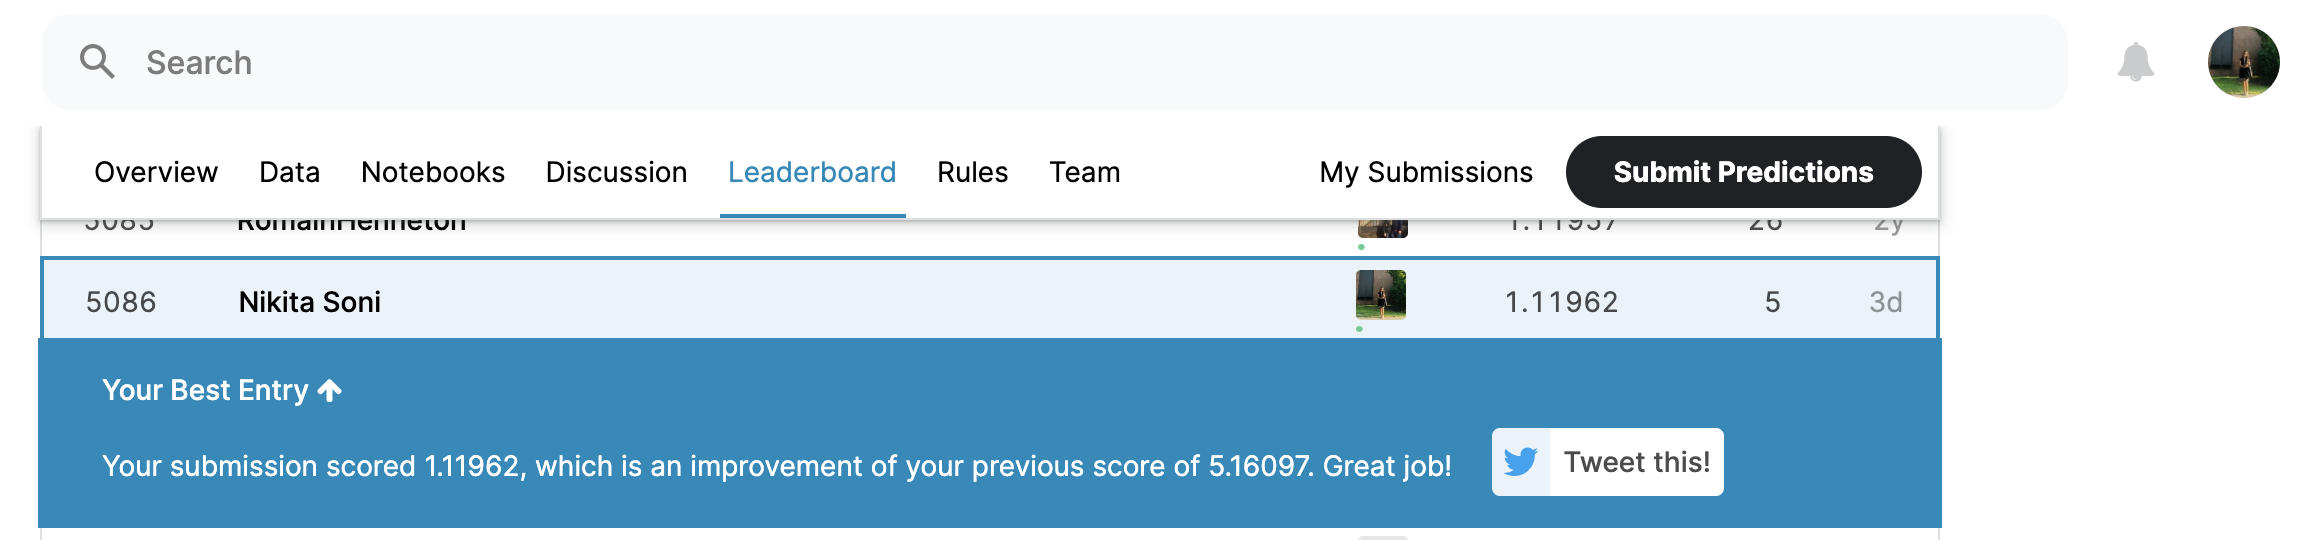

## References

https://stackoverflow.com/ 

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://www.kaggle.com/dimitreoliveira/model-stacking-feature-engineering-and-eda/notebook 

